In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as onp
import matplotlib.pyplot as plt
from ridgeRegression import *
from diffevol import *
from moleculToVector import *
from thetas import *
from xyz2bat import *
from jax import jacfwd
from jax import vmap

/Molly/dogonasheva_o/LRR-DE/moleculToVector.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
structs_with_forces = read_dataset('forces/gphase/t-1/11_cis-pos-1.xyz', 'forces/gphase/t-1/forces')
structs_with_forces = structs_with_forces
struct_description, amber_coeffs = get_struct_description('test-Olesya/Initial_parameters_with_numbers_and_dihedrals_only.txt')
# dataset = get_dataset(structs_with_forces, struct_description)
test_structs = read_dataset('forces/gphase/t-4/11_cis-pos-1.xyz', 'forces/gphase/t-4/forces')

In [4]:
thetas = {
    'bonds': amber_coeffs.bonds_zero_values,
    'angles': amber_coeffs.angles_zero_values,
    'torsions': amber_coeffs.torsions_zero_phase,
    'ns': amber_coeffs.ns,
    'q': amber_coeffs.qs,
    'sigma_for_vdw': amber_coeffs.sigma_for_vdw,
    'epsilon_for_vdw': amber_coeffs.epsilons_for_vdw
}

In [5]:
all_coords = np.array([struct.coords for struct in structs_with_forces])

/home/gnovikov/miniconda3/envs/ml/lib/python3.7/site-packages/jax/lib/xla_bridge.py:119: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [6]:
energy = np.array([struct.energy for struct in structs_with_forces])
forces = np.array([struct.forces for struct in structs_with_forces])

In [7]:
forces = forces.reshape(-1)

In [8]:
# HH_map = xyz2bat2constr_HH_map(all_coords, struct_description.as_dict(), thetas)
# HH_map = HH_map.reshape(-1, HH_map.shape[-1])

In [10]:
de = DE(all_coords, struct_description, amber_coeffs, forces, test_structs)
l_bonds = len(amber_coeffs.bonds_zero_values)
l_angles = len(amber_coeffs.angles_zero_values)
l_torsions = len(amber_coeffs.torsions_zero_phase)
l_q = len(amber_coeffs.qs)
l_sigma = len(amber_coeffs.sigma_for_vdw)
l_epsilon = len(amber_coeffs.epsilons_for_vdw)

k = l_bonds + l_angles + l_torsions + l_q + l_sigma + l_epsilon + 1

de.run(k, 20)


err: 0.0002374096366111189
time: 117.33747744560242
err: 0.00024306595150846988
time: 11.054990291595459
err: 0.0002346172695979476
time: 11.130980253219604
err: 0.0002282045898027718
time: 11.162371397018433
err: 0.00024912881781347096
time: 10.976984024047852
err: 0.00023579005210194737
time: 11.131366968154907
err: 0.00022571190493181348
time: 10.988181114196777
err: 0.00023636294645257294
time: 10.935999393463135
err: 0.00024423570721410215
time: 10.931581258773804
err: 0.00024717673659324646
time: 11.180047512054443
err: 0.00021742095123045146
time: 10.890905141830444
err: 0.00024200121697504073
time: 10.973077058792114
err: 0.00022483360953629017
time: 11.062620878219604
err: 0.00023931566101964563
time: 11.10716986656189
err: 0.0002352091541979462
time: 11.184558868408203
err: 0.00021421219571493566
time: 11.016780614852905
err: 0.0002394468174315989
time: 11.088423728942871
err: 0.00024424176081083715
time: 10.90862512588501
err: 0.00022230384638532996
time: 10.85400104522705


err: 0.0002259542525280267
time: 7.601128578186035
err: 0.00022328289924189448
time: 7.5428760051727295
err: 0.00022346494370140135
time: 7.725759267807007
err: 0.00021683418890461326
time: 7.604270696640015
err: 0.00022211666509974748
time: 7.58467960357666
err: 0.00023221351148094982
time: 7.524495363235474
err: 0.000212772298255004
time: 7.5936055183410645
err: 0.0002184861368732527
time: 7.635967493057251
err: 0.0002371344598941505
time: 7.791435718536377
err: 0.00022442500630859286
time: 7.560903787612915
err: 0.00024251230934169143
time: 7.56389307975769
err: 0.00023052092001307756
time: 7.702301740646362
err: 0.00023694355331826955
time: 7.563827991485596
err: 0.00023728504311293364
time: 7.737455368041992
err: 0.00023188567138276994
time: 7.7621986865997314
err: 0.0002214400883531198
time: 7.742565393447876
err: 0.00023136302479542792
time: 7.520310401916504
err: 0.000213430670555681
time: 7.728714227676392
err: 0.0002264827926410362
time: 8.161816120147705
err: 0.0002371540758

err: 0.00021886690228711814
time: 7.62024998664856
err: 0.00020775471057277173
time: 7.591478586196899
err: 0.00020867670536972582
time: 7.692406177520752
err: 0.00021324542467482388
time: 7.639085054397583
err: 0.00022343648015521467
time: 7.70332932472229
err: 0.00023771965061314404
time: 7.693800687789917
err: 0.0002263073984067887
time: 7.575843095779419
err: 0.00022066482051741332
time: 7.623586654663086
err: 0.0002404296537861228
time: 7.6417236328125
err: 0.00023774079454597086
time: 7.702308893203735
err: 0.00022731060744263232
time: 7.651368618011475
err: 0.00022346084006130695
time: 8.00749921798706
err: 0.00023740499455016106
time: 7.58856725692749
err: 0.00020480682724155486
time: 7.557895183563232
err: 0.00023077796504367143
time: 8.029940128326416
err: 0.00023181938740890473
time: 7.638705253601074
err: 0.00022877515584696084
time: 7.760077714920044
err: 0.00023262914328370243
time: 8.063995361328125
err: 0.00020867747662123293
time: 8.002874374389648
err: 0.0002295016020

err: 0.00023496961512137204
time: 7.5944905281066895
err: 0.00023381631763186306
time: 7.614135980606079
err: 0.000223046779865399
time: 7.639368772506714
err: 0.00021475004905369133
time: 7.671689033508301
err: 0.00023012456949800253
time: 7.641033887863159
err: 0.00020634930115193129
time: 7.551364183425903
err: 0.0002114639210049063
time: 7.667876482009888
err: 0.00020514740026555955
time: 7.771329164505005
err: 0.00019673470524139702
time: 7.883539199829102
err: 0.00022073213767725974
time: 7.866175174713135
err: 0.00021511514205485582
time: 7.920440673828125
err: 0.00022450667165685445
time: 7.868876695632935
err: 0.0002188680664403364
time: 7.701707124710083
err: 0.0002208728838013485
time: 7.86638617515564
err: 0.00021121361351106316
time: 8.021791696548462
err: 0.00020724425849039108
time: 7.753427267074585
err: 0.0002150801446987316
time: 7.572562217712402
err: 0.00021747438586317003
time: 7.6693034172058105
err: 0.00021594224381260574
time: 7.560367584228516
err: 0.0002165991

err: 0.00023037854407448322
time: 7.644529104232788
err: 0.00022522143262904137
time: 7.582741737365723
err: 0.0002277368475915864
time: 7.611684560775757
err: 0.00021723077225033194
time: 7.672314167022705
err: 0.00020682319882325828
time: 7.813066244125366
err: 0.00022329586499836296
time: 7.7043657302856445
err: 0.00021559539891313761
time: 7.535166501998901
err: 0.00022167839051689953
time: 7.984670162200928
err: 0.00021365004067774862
time: 7.68072509765625
err: 0.0002225092612206936
time: 7.839975357055664
err: 0.0002105651656165719
time: 8.134605884552002
err: 0.0002239583118353039
time: 7.973875522613525
err: 0.00023080699611455202
time: 7.643956661224365
err: 0.011087995953857899
time: 7.638307094573975
err: 0.0002053908829111606
time: 7.92545485496521
err: 0.0002128556079696864
time: 7.508612871170044
err: 0.00022497236204799265
time: 7.624962568283081
err: 0.00021939467114862055
time: 7.510095596313477
err: 0.00020910635066684335
time: 7.62423849105835
err: 0.000198581023141

err: 0.00018886545149143785
time: 7.817453861236572
err: 0.00020193304226268083
time: 7.849149465560913
err: 0.000191164537682198
time: 7.656670808792114
err: 0.0002161889715353027
time: 7.81771993637085
err: 0.00021285009279381484
time: 7.772165298461914
err: 0.00021456916874740273
time: 7.586105585098267
err: 0.000202896015252918
time: 7.981725692749023
err: 0.00021740319789387286
time: 8.135135173797607
err: 0.008183245547115803
time: 8.083123683929443
err: 0.00022634858032688498
time: 7.822705030441284
err: 0.00020935642533004284
time: 7.599941730499268
err: 0.0002095402596751228
time: 7.7499237060546875
err: 0.00021282727539073676
time: 7.703443765640259
err: 0.00022402429021894932
time: 7.6150946617126465
err: 0.00020913052139803767
time: 7.521215915679932
err: 0.00020809740817639977
time: 7.713318347930908
err: 0.00020237079297658056
time: 7.548987150192261
err: 0.0002214321430074051
time: 7.595993280410767
err: 0.00019415326823946089
time: 7.586410045623779
err: 0.0002325967507

err: 0.00019814509141724557
time: 7.581135988235474
err: 0.0003044281038455665
time: 7.5342254638671875
err: 0.00037818856071680784
time: 7.5480055809021
err: 0.00020260800374671817
time: 7.707096099853516
err: 0.00020244107872713357
time: 7.5797669887542725
err: 0.00022175443882588297
time: 7.624843120574951
err: 0.00022128723503556103
time: 7.535171270370483
err: 0.0001892838772619143
time: 7.712434530258179
err: 0.00021721042867284268
time: 7.723268270492554
err: 0.00021636638848576695
time: 7.678685426712036
err: 0.00019021285697817802
time: 7.786509990692139
err: 0.0015324820997193456
time: 9.34166955947876
err: 0.00021305463451426476
time: 7.676703691482544
err: 0.00020660135487560183
time: 7.734363794326782
err: 0.00021834058861713856
time: 7.636688947677612
err: 0.0002014396304730326
time: 7.610773801803589
err: 0.00020410286379046738
time: 7.708545684814453
err: 0.00022291720961220562
time: 7.660974025726318
err: 0.002022954635322094
time: 7.630700349807739
err: 0.000205761389

err: 0.00020913075422868133
time: 7.606916427612305
err: 0.00020925095304846764
time: 7.542055606842041
err: 0.00020938232773914933
time: 7.523937463760376
err: 0.00022421694302465767
time: 7.551490306854248
err: 0.00020889192819595337
time: 7.7339255809783936
err: 0.00020797393517568707
time: 7.559351205825806
err: 0.00021095157717354596
time: 7.588987112045288
err: 0.00021168217062950134
time: 7.518695592880249
err: 0.00019639666425064206
time: 7.7911765575408936
err: 0.00020936735381837934
time: 7.5209901332855225
err: 0.00022704116418026388
time: 7.7828428745269775
err: 0.00020970084005966783
time: 7.689114809036255
err: 0.00020782745559699833
time: 8.985681533813477
err: 0.00020426593255251646
time: 7.631791353225708
err: 0.0013202892150729895
time: 7.594311237335205
err: 0.00019295726087875664
time: 7.479034900665283
err: 0.0007669163751415908
time: 7.700532674789429
err: 0.00023339370090980083
time: 7.569827318191528
err: 0.00019637453078757972
time: 7.861648082733154
err: 0.000

err: 0.0002081063576042652
time: 7.498257637023926
err: 0.00022915755107533187
time: 7.7036871910095215
err: 0.00019968319975305349
time: 7.598705291748047
err: 0.00019498716574162245
time: 7.6277947425842285
err: 0.00020485410641413182
time: 7.813628911972046
err: 0.00021170914988033473
time: 7.587939262390137
err: 0.0002109145134454593
time: 7.660037994384766
err: 0.009098132140934467
time: 7.60176157951355
err: 0.00022102866205386817
time: 7.574558973312378
err: 0.00020287260122131556
time: 7.480745792388916
err: 0.0001869433472165838
time: 7.595054388046265
err: 0.00020644481992349029
time: 7.473777532577515
err: 0.0002178232098231092
time: 7.59099555015564
err: 0.00021407511667348444
time: 9.769681453704834
err: 0.00023513866472057998
time: 7.681803226470947
err: 1.276676893234253
time: 7.738726854324341
err: 0.00020863660029135644
time: 7.665755033493042
err: 0.00020611965737771243
time: 7.701966047286987
err: 0.00020721141481772065
time: 7.9311912059783936
err: 0.001616720808669

err: 0.00020164942543487996
time: 7.646979093551636
err: 0.00020157283870503306
time: 7.608048439025879
err: 0.00020580532145686448
time: 7.6590375900268555
err: 0.00023073895135894418
time: 7.782848596572876
err: 0.00021108541113790125
time: 7.711745023727417
err: 0.001397470710799098
time: 7.563863277435303
err: 0.00021024908346589655
time: 7.5358662605285645
err: 0.00018978647131007165
time: 7.428334712982178
err: 0.0002121642610291019
time: 7.424757719039917
err: 0.00019537453772500157
time: 7.741079330444336
err: 0.00019080151105299592
time: 7.528881311416626
err: 0.00020398096239659935
time: 7.864535331726074
err: 0.00021056905097793788
time: 7.586432218551636
err: 0.0001960836525540799
time: 9.479791164398193
err: 0.564903199672699
time: 7.738332748413086
err: 0.00020346288511063904
time: 7.673717021942139
err: 0.00019329562201164663
time: 7.816616773605347
err: 0.00021006747556384653
time: 8.103183507919312
err: 0.0002336797770112753
time: 7.804168701171875
err: 0.0002423996484

err: 0.0002781559887807816
time: 7.592068433761597
err: 0.00038336068973876536
time: 7.607451915740967
err: 0.31345313787460327
time: 7.738729238510132
err: 0.00021018984261900187
time: 7.679046154022217
err: 0.0251984354108572
time: 7.55873966217041
err: 0.00019691720081027597
time: 7.74984073638916
err: 0.002189075108617544
time: 7.553316116333008
err: 0.00019237826927565038
time: 7.681358337402344
err: 0.0002649023081175983
time: 7.8034961223602295
err: 0.0002135820541298017
time: 7.660088062286377
err: 0.0002125382743543014
time: 7.778668642044067
err: 0.00018629030091688037
time: 7.6821746826171875
err: 0.0002339734637644142
time: 7.600876569747925
err: 0.2738477885723114
time: 7.881685495376587
err: 0.00028105065575800836
time: 10.224858283996582
err: 0.00020812275761272758
time: 7.891089677810669
err: 0.0002445638820063323
time: 7.757686614990234
err: 0.0002125314495060593
time: 7.59809422492981
err: 0.00020472721371334046
time: 7.616437673568726
err: 0.00019753811648115516
time

err: 0.00020258917356841266
time: 7.574564695358276
err: 0.00020709978707600385
time: 7.500052452087402
err: 0.00019912865536753088
time: 7.5264892578125
err: 0.0001975948689505458
time: 7.693427801132202
err: 0.00021484958415385336
time: 7.960481882095337
err: 0.0001900869101518765
time: 7.612027406692505
err: 851.03759765625
time: 7.874422073364258
err: 0.00020764411601703614
time: 7.670154571533203
err: 0.00018647300021257252
time: 7.738157272338867
err: 0.00019722453725989908
time: 7.947206974029541
err: 0.0001946023403434083
time: 8.02579951286316
err: 0.00019504349620547146
time: 7.538662433624268
err: 0.00020948206656612456
time: 7.471280813217163
err: 0.00019622466061264277
time: 7.629510164260864
err: 0.00020436756312847137
time: 9.296748638153076
err: 0.0001953028404386714
time: 7.5712878704071045
err: 0.0005164166213944554
time: 7.528522491455078
err: 0.0002016115322476253
time: 7.828328371047974
err: 0.00017863267567008734
time: 7.824137210845947
err: 0.00021029007621109486

err: 183.0281982421875
time: 7.716668128967285
err: 0.00019203548436053097
time: 7.774637699127197
err: 0.0001903398660942912
time: 7.694974422454834
err: 0.00018258398631587625
time: 7.663065195083618
err: 0.00020646805933211
time: 7.636589050292969
err: 0.0006972157279960811
time: 8.023136377334595
err: 0.00019682018319144845
time: 7.911464214324951
err: 0.0002870763128157705
time: 7.611333131790161
err: 0.002891323994845152
time: 7.707116365432739
err: 0.0005019852542318404
time: 7.645980596542358
err: 0.0001858650939539075
time: 7.869234085083008
err: 0.00019245872681494802
time: 7.6854448318481445
err: 0.00020678590226452798
time: 7.62292218208313
err: 0.00020213173411320895
time: 7.728662014007568
err: 0.0001886016980279237
time: 9.304505348205566
err: 0.00020382458751555532
time: 7.6039063930511475
err: 0.00019662069098558277
time: 7.515322208404541
err: 0.00018161186017096043
time: 7.635087728500366
err: 0.000209692312637344
time: 7.567577362060547
err: 0.00020127771131228656
t

err: 1.3796623945236206
time: 7.853893041610718
err: 0.0002037652739090845
time: 8.083969593048096
err: 0.00202743848785758
time: 7.854072332382202
err: 0.00019383314065635204
time: 7.720056533813477
err: 0.0002146852930309251
time: 7.595401048660278
err: 130.42715454101562
time: 7.545740127563477
err: 0.00020212159142829478
time: 7.595263719558716
err: 0.00018933980027213693
time: 7.690922975540161
err: 0.00019374287512619048
time: 7.679813385009766
err: 0.00023271348618436605
time: 7.553817987442017
err: 0.00019922673527617007
time: 7.448091745376587
err: 0.00019449165847618133
time: 7.620939016342163
err: 0.00019398820586502552
time: 7.687929391860962
err: 0.00018654156883712858
time: 7.607290506362915
err: 0.00019804559997282922
time: 9.423555374145508
err: 0.00018921162700280547
time: 7.5682666301727295
err: 0.000251827179454267
time: 7.596379280090332
err: 0.00019343836174812168
time: 7.77656888961792
err: 0.0001966368727153167
time: 7.667578220367432
err: 0.00018546750652603805


err: 0.0001940287766046822
time: 7.643444538116455
err: 0.00017058636876754463
time: 7.44397234916687
err: 0.00017961546836886555
time: 7.588310241699219
err: 0.00019173311011400074
time: 7.595578908920288
err: 0.0003263891558162868
time: 7.606184244155884
err: 69.16896057128906
time: 7.521042585372925
err: 0.00018347638251725584
time: 7.575871706008911
err: 0.0001861817727331072
time: 7.676540851593018
err: 0.0001667465694481507
time: 7.478646755218506
err: 0.00019518817134667188
time: 7.790088415145874
err: 0.0001881397038232535
time: 7.510562896728516
err: 0.0001704175228951499
time: 7.440435886383057
err: 0.00020657101413235068
time: 7.476962089538574
err: 0.00019001547480002046
time: 7.531274080276489
err: 0.0001979291409952566
time: 10.112582921981812
err: 0.00019630866881925613
time: 7.578277826309204
err: 0.00018646761600393802
time: 7.652519702911377
err: 0.0001796875731088221
time: 7.53263258934021
err: 0.00019606153364293277
time: 7.597764253616333
err: 0.0001902068470371887

err: 0.0001980461529456079
time: 7.490300178527832
err: 0.00018305954290553927
time: 7.8157312870025635
err: 0.00017883330292534083
time: 7.487316370010376
err: 0.00019478735339362174
time: 7.661959409713745
err: 0.00019118977070320398
time: 7.523855924606323
err: 0.00018735273624770343
time: 7.606351375579834
err: 0.00017343783110845834
time: 7.492850303649902
err: 0.00020115263760089874
time: 7.614238023757935
err: 0.00019602503743954003
time: 7.461444854736328
err: 0.0001739203289616853
time: 7.576799392700195
err: 0.0001874224399216473
time: 7.400959253311157
err: 0.0001737350830808282
time: 7.664425373077393
err: 0.00020004350517410785
time: 7.494163274765015
err: 0.00018631351122166961
time: 7.520995140075684
err: 0.00017853517783805728
time: 7.973366737365723
err: 0.0001741607120493427
time: 7.558494567871094
err: 0.00018627819372341037
time: 7.5171215534210205
err: 0.00018757030193228275
time: 7.582909822463989
err: 0.00018386237206868827
time: 7.584565162658691
err: 0.00019151

err: 0.0001789520465536043
time: 7.613054037094116
err: 0.00017693350673653185
time: 7.645575046539307
err: 0.00018669062410481274
time: 7.538044691085815
err: 0.00017803837545216084
time: 7.478431940078735
err: 0.00019380291632842273
time: 7.489086627960205
err: 0.00018803759303409606
time: 7.656562328338623
err: 0.00018362703849561512
time: 7.739624261856079
err: 0.0013046219246461987
time: 7.496440172195435
err: 0.00020197105186525732
time: 7.604176759719849
err: 0.00017062382539734244
time: 7.545961141586304
err: 0.0001803702616598457
time: 7.580963134765625
err: 0.00018654372252058238
time: 7.821482181549072
err: 0.0001790267851902172
time: 7.586143732070923
err: 0.000192654159036465
time: 7.527355432510376
err: 0.00017454074986744672
time: 9.894619703292847
err: 0.00018673535669222474
time: 7.574893474578857
err: 0.00017406400002073497
time: 7.590445518493652
err: 0.00019325196626596153
time: 7.6319990158081055
err: 0.00018755839846562594
time: 7.612344026565552
err: 0.0152546800

err: 0.0001919840433401987
time: 7.5819010734558105
err: 0.00017419802315998822
time: 7.498746395111084
err: 0.00017755237058736384
time: 7.6273510456085205
err: 0.00020292641420383006
time: 7.570685386657715
err: 0.00018804709543474019
time: 7.545931339263916
err: 0.00018753162294160575
time: 7.60257887840271
err: 0.011812752112746239
time: 7.566268444061279
err: 0.00018946730415336788
time: 7.476378679275513
err: 0.00017424774705432355
time: 7.740827798843384
err: 0.00034765663440339267
time: 7.587480068206787
err: 0.00017906450375448912
time: 7.525390625
err: 0.00018830777844414115
time: 7.6819093227386475
err: 0.00018084445036947727
time: 7.5214879512786865
err: 0.0005176661652512848
time: 7.634443998336792
err: 0.00017699999443721026
time: 7.747355222702026
err: 0.00018635806918609887
time: 10.545707941055298
err: 0.00017609533097129315
time: 7.58307409286499
err: 0.00017876527272164822
time: 7.611278772354126
err: 0.00018768639711197466
time: 7.564103841781616
err: 0.004972243681

err: 0.017034560441970825
time: 7.515998363494873
err: 0.00018320618255529553
time: 7.585979700088501
err: 0.00017692401888780296
time: 7.563092470169067
err: 0.0001774346164893359
time: 7.739504814147949
err: 0.0001907311234390363
time: 7.4784440994262695
err: 0.00016925843374338
time: 7.567063093185425
err: 0.00016781465092208236
time: 7.706047296524048
err: 0.00016819029406178743
time: 7.650698900222778
err: 0.00017530510376673192
time: 7.593843698501587
err: 0.00018327494035474956
time: 7.651302099227905
err: 0.00018142010958399624
time: 7.5571277141571045
err: 0.0001709961798042059
time: 7.552926301956177
err: 0.006946528796106577
time: 7.5424370765686035
err: 0.00016765018517617136
time: 7.615902423858643
err: 0.00018489973444957286
time: 7.807666063308716
err: 0.00017636304255574942
time: 9.051063537597656
err: 0.00018034134700428694
time: 7.510897397994995
err: 0.0003260275407228619
time: 7.968339443206787
err: 0.0001930229045683518
time: 7.688984632492065
err: 0.00017700092575

err: 0.00018700381042435765
time: 7.462303638458252
err: 0.00019011371477972716
time: 7.5554821491241455
err: 0.00019675384100992233
time: 7.656657457351685
err: 0.00019625650020316243
time: 7.555294036865234
err: 0.00016908382531255484
time: 7.679286003112793
err: 0.00019517558393999934
time: 7.627242803573608
err: 0.0003427458577789366
time: 7.607359409332275
err: 0.00018208973051514477
time: 7.6584792137146
err: 0.00019153967150487006
time: 7.566304922103882
err: 0.0001731674710754305
time: 7.497016668319702
err: 0.00016839231830090284
time: 7.717253684997559
err: 0.00018841098062694073
time: 7.854188919067383
err: 0.0001886141108116135
time: 7.689799785614014
err: 0.00019395328126847744
time: 7.908522129058838
err: 0.0001682484580669552
time: 7.608321905136108
err: 0.0001725067268125713
time: 10.03752064704895
err: 0.00017137308896053582
time: 8.125306367874146
err: 0.00017691764514893293
time: 7.806396961212158
err: 0.00018838769756257534
time: 7.7080183029174805
err: 0.0001794673

err: 0.00017739897884894162
time: 7.510260820388794
err: 0.00017869814473669976
time: 7.706970930099487
err: 0.0025449662934988737
time: 7.576746702194214
err: 0.0001836551382439211
time: 7.534569978713989
err: 0.00019041431369259953
time: 7.469188690185547
err: 0.00016732556105125695
time: 7.511090517044067
err: 0.00016015737492125481
time: 7.521843910217285
err: 0.000191063794773072
time: 8.030660390853882
err: 0.0001731529482640326
time: 7.7252724170684814
err: 0.00018337882647756487
time: 7.82632303237915
err: 0.00015523088222835213
time: 7.837677240371704
err: 0.00016634709027130157
time: 7.542233467102051
err: 0.00016538113413844258
time: 7.644329309463501
err: 0.00017678125004749745
time: 8.1010103225708
err: 0.00016926319221965969
time: 8.040838479995728
err: 0.00018170045223087072
time: 7.688580274581909
err: 0.00017259515880141407
time: 8.716726541519165
err: 0.00018090955563820899
time: 7.773875713348389
err: 0.00016131896700244397
time: 7.597245454788208
err: 0.000187798606

err: 0.00017571827629581094
time: 7.613537788391113
err: 0.000179979411768727
time: 7.571912050247192
err: 0.000180258066393435
time: 7.843929290771484
err: 0.00017329621186945587
time: 7.672644853591919
err: 0.00018312055908609182
time: 7.782517194747925
err: 0.00016402988694608212
time: 7.552120685577393
err: 0.00016057332686614245
time: 7.786206007003784
err: 0.00017634413961786777
time: 7.795001268386841
err: 0.00017761981871444732
time: 7.67341947555542
err: 0.00017940538236871362
time: 7.946897029876709
err: 0.00018173873831983656
time: 8.227688550949097
err: 0.00015723887190688401
time: 7.88390851020813
err: 0.00017195688269566745
time: 7.809436559677124
err: 0.00017987731553148478
time: 7.506505012512207
err: 0.00016951060388237238
time: 7.4534008502960205
err: 0.00016625577700324357
time: 7.533302068710327
err: 0.00016185209096875042
time: 7.683704853057861
err: 0.00018057359557133168
time: 9.810569047927856
err: 0.00016966422845143825
time: 7.62389612197876
err: 0.00016632239

err: 0.00016530082211829722
time: 7.638123989105225
err: 0.00015978867304511368
time: 7.709141731262207
err: 0.00015908664499875158
time: 7.624087572097778
err: 0.00018066853226628155
time: 7.731213331222534
err: 0.00016068726836238056
time: 7.83144474029541
err: 0.00017268076771870255
time: 7.674347877502441
err: 0.0001604684948688373
time: 7.984370708465576
err: 0.00017604340973775834
time: 7.978420972824097
err: 0.00016896075976546854
time: 7.825153827667236
err: 0.0001709531934466213
time: 7.712711334228516
err: 0.00016707561735529453
time: 7.5861921310424805
err: 0.00018179387552663684
time: 7.672220230102539
err: 0.0001629119651624933
time: 7.72024393081665
err: 0.00016138322826009244
time: 7.667439937591553
err: 0.00016641280672047287
time: 7.5836591720581055
err: 0.000156760448589921
time: 7.579283714294434
err: 0.00016928667901083827
time: 7.587401390075684
err: 0.00016190067981369793
time: 7.534979820251465
err: 0.00017419650976080447
time: 9.436721801757812
err: 0.0001689613

err: 0.00015636111493222415
time: 7.942003011703491
err: 0.00015759214875288308
time: 7.888585329055786
err: 0.0001649166370043531
time: 7.823939561843872
err: 0.0001543680700706318
time: 8.098110437393188
err: 0.00017687752551864833
time: 7.9234254360198975
err: 0.00015796201478224248
time: 7.628586053848267
err: 0.0001675779785728082
time: 7.621592998504639
err: 0.0001508646528236568
time: 7.7024922370910645
err: 0.0001649559853831306
time: 7.612837076187134
err: 0.000176647023181431
time: 7.532635927200317
err: 0.00016464266809634864
time: 7.71047568321228
err: 0.00017144293815363199
time: 7.567852020263672
err: 0.00017276822472922504
time: 7.589243412017822
err: 0.00016590143786743283
time: 7.596935510635376
err: 0.00015649720444343984
time: 7.554574728012085
err: 0.00015453390369657427
time: 7.561994552612305
err: 0.0001692381192697212
time: 7.575968503952026
err: 0.00017948019376490265
time: 7.7311389446258545
err: 0.00016196687647607177
time: 7.608159780502319
err: 0.00015581370

err: 0.00015625249943695962
time: 8.081579685211182
err: 0.0001434407604392618
time: 7.810369968414307
err: 0.00022700904810335487
time: 7.646820068359375
err: 0.0001677750697126612
time: 7.648684978485107
err: 0.00016426360525656492
time: 7.695897102355957
err: 0.00015365026774816215
time: 7.698089122772217
err: 0.00015496576088480651
time: 7.5126118659973145
err: 0.00015515281120315194
time: 7.496733665466309
err: 0.00017067301087081432
time: 7.452519416809082
err: 0.00015970764798112214
time: 7.530691862106323
err: 0.00016020583279896528
time: 7.4920334815979
err: 0.0001447673566872254
time: 7.634767770767212
err: 0.00016578545910306275
time: 7.693821907043457
err: 0.0001541707752039656
time: 7.693272113800049
err: 0.00014662380272056907
time: 7.566774606704712
err: 0.00015197382890619338
time: 7.69579553604126
err: 0.00016350064834114164
time: 7.626803874969482
err: 0.00014787414693273604
time: 7.475757598876953
err: 0.0001622562704142183
time: 7.713437557220459
err: 0.000159755611

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



err: 0.00013624895655084401
time: 7.564079999923706
err: 0.00013712557847611606
time: 7.417394161224365
err: 0.00012901294394396245
time: 7.654040336608887
err: 0.00012400824925862253
time: 7.51128077507019
err: 0.00012839790724683553
time: 7.5650553703308105
err: 0.00012311495083849877
time: 7.489184856414795
err: 0.0001328024809481576
time: 7.4212846755981445
err: 0.0001240152632817626
time: 7.514585971832275
err: 0.00012668634008150548
time: 7.53745174407959
err: 0.00013089987623970956
time: 7.664515018463135
err: 0.00011980384442722425
time: 7.631148815155029
err: 0.00013052806025370955
time: 7.495706558227539
err: 0.00012623511429410428
time: 7.799360752105713
err: 0.0001227245229529217
time: 7.557624101638794
err: 0.00012532425171229988
time: 7.733452558517456
err: 0.0001217402532347478
time: 7.4394121170043945
err: 0.0001363534393021837
time: 9.819300174713135
err: 0.00012362028064671904
time: 7.638111591339111
err: 0.00012459272693376988
time: 7.592264890670776
err: 0.000130128

err: 0.00012313776824157685
time: 7.617746353149414
err: 0.0001346397475572303
time: 7.674375534057617
err: 0.00013233034405857325
time: 7.531087875366211
err: 0.00013180667883716524
time: 7.363697290420532
err: 0.00012757544755004346
time: 7.419917583465576
err: 0.00012122147745685652
time: 7.465341806411743
err: 0.00013032885908614844
time: 7.482351541519165
err: 0.0008465591236017644
time: 7.685096979141235
err: 0.00013106613187119365
time: 7.604214191436768
err: 0.00019656911899801344
time: 7.6289403438568115
err: 0.00012720802624244243
time: 7.546852350234985
err: 0.000123144724057056
time: 7.4534995555877686
err: 0.00012236677866894752
time: 7.466309070587158
err: 0.0001366932556265965
time: 7.539801120758057
err: 0.00012924170005135238
time: 7.525527715682983
err: 0.0001268477353733033
time: 7.6442601680755615
err: 0.00013416902220342308
time: 7.643847465515137
err: 0.00012295262422412634
time: 10.219603776931763
err: 0.00012387492461130023
time: 7.498138427734375
err: 0.0001287

err: 0.00012478097050916404
time: 7.550532579421997
err: 0.00028809276409447193
time: 7.454722881317139
err: 0.00012573483400046825
time: 7.7015767097473145
err: 0.0001253767841262743
time: 7.506444692611694
err: 0.00012979998427908868
time: 7.590743780136108
err: 0.00013205969298724085
time: 7.818783283233643
err: 0.0001307901693508029
time: 7.741779565811157
err: 0.0001295029796892777
time: 7.624661922454834
err: 0.00013252036296762526
time: 7.6576454639434814
err: 0.00012808402243535966
time: 7.576343059539795
err: 0.00013679967378266156
time: 7.54994797706604
err: 0.00013153637701179832
time: 7.586748123168945
err: 0.00012925511691719294
time: 7.561967372894287
err: 0.0001293046516366303
time: 7.487276077270508
err: 0.00011880672536790371
time: 7.481279611587524
err: 0.00011886846186826006
time: 7.640162467956543
err: 0.0001276780676562339
time: 7.659442901611328
err: 0.00012702198000624776
time: 7.52420449256897
err: 0.00011931251356145367
time: 10.530649662017822
err: 0.000125377

err: 0.00011830961011582986
time: 7.53895115852356
err: 0.00012502711615525186
time: 7.745225429534912
err: 0.00011875487689394504
time: 7.532361268997192
err: 0.00012440264981705695
time: 7.785943508148193
err: 0.00012524594785645604
time: 7.619723558425903
err: 0.00013289746129885316
time: 7.70360541343689
err: 0.00013413268607109785
time: 7.464785575866699
err: 0.0001218911784235388
time: 7.583848714828491
err: 0.00011439583613537252
time: 7.541269540786743
err: 0.00012480930308811367
time: 7.490984201431274
err: 0.00011309172259643674
time: 7.515821933746338
err: 0.00028171431040391326
time: 7.488170385360718
err: 0.00012685885303653777
time: 7.534341812133789
err: 0.00012733551557175815
time: 7.500870704650879
err: 0.00012313439219724387
time: 7.4342827796936035
err: 0.00012248422717675567
time: 7.610377311706543
err: 0.00011762091889977455
time: 7.671306610107422
err: 0.00011804656242020428
time: 7.482649326324463
err: 0.00011736950546037406
time: 7.614037275314331
err: 0.0001198

err: 0.00011948903556913137
time: 7.63378643989563
err: 0.0001213312498293817
time: 7.603054046630859
err: 0.00011943995923502371
time: 7.461738109588623
err: 0.00011805165559053421
time: 7.482617139816284
err: 0.000127198058180511
time: 7.453296661376953
err: 0.00012099945161025971
time: 7.498669385910034
err: 0.00012715441698674113
time: 7.473793983459473
err: 0.0001121354871429503
time: 7.542920827865601
err: 0.00012060898006893694
time: 7.580203533172607
err: 0.00011881491082021967
time: 7.592377185821533
err: 0.0001228661712957546
time: 7.714637279510498
err: 0.00012290872109588236
time: 7.494237184524536
err: 0.00011900099343620241
time: 7.739552736282349
err: 0.00012924737529829144
time: 7.522271156311035
err: 0.00011445151176303625
time: 7.60477352142334
err: 0.00011965323938056827
time: 7.609973907470703
err: 0.00013146056153345853
time: 7.7658843994140625
err: 0.0001289563369937241
time: 7.822387456893921
err: 0.00011715475557139143
time: 7.592547655105591
err: 0.000123850011

err: 0.00011385193647583947
time: 8.09549355506897
err: 0.00012374504876788706
time: 7.610025405883789
err: 0.00012644640810322016
time: 7.561094522476196
err: 0.00011237114085815847
time: 7.729823112487793
err: 0.0001125607086578384
time: 7.652880907058716
err: 0.00011532261123647913
time: 7.802738666534424
err: 0.00011748542601708323
time: 7.7751758098602295
err: 0.0001192356794490479
time: 8.80574655532837
err: 0.0001248383050551638
time: 8.059767246246338
err: 0.00011520149564603344
time: 8.023319244384766
err: 0.00011589618952712044
time: 8.065091371536255
err: 0.00011556882236618549
time: 8.027373313903809
err: 0.00011738668399630114
time: 7.615657567977905
err: 0.00011542591528268531
time: 7.714362621307373
err: 0.0001168061135103926
time: 8.459579229354858
err: 0.00011500727850943804
time: 8.215321063995361
err: 0.00012204951781313866
time: 7.777610778808594
err: 0.00011012909089913592
time: 7.680851221084595
err: 0.00011370003630872816
time: 8.034789562225342
err: 0.0001113134

err: 0.00011745285883080214
time: 7.6841957569122314
err: 0.00012089082883903757
time: 7.949363946914673
err: 0.00012193602742627263
time: 7.917759418487549
err: 0.00011867204011650756
time: 7.955180883407593
err: 0.00011468150478322059
time: 7.745521068572998
err: 0.00011964482837356627
time: 7.920799255371094
err: 0.00011597297998378053
time: 7.891955137252808
err: 0.00011569377966225147
time: 7.942729473114014
err: 0.00011947208258789033
time: 8.020403146743774
err: 0.00011832631571451202
time: 7.784304618835449
err: 0.00011731276026694104
time: 7.839986085891724
err: 0.00011739129695342854
time: 8.255221605300903
err: 0.00012061476445524022
time: 8.032620668411255
err: 0.00011656978313112631
time: 7.932540655136108
err: 0.000118319432658609
time: 7.7793073654174805
err: 0.00011818599159596488
time: 7.810644865036011
err: 0.00010913412552326918
time: 7.850846767425537
err: 0.00011183448077645153
time: 8.905562162399292
err: 0.00011696243745973334
time: 7.664479494094849
err: 0.00011

err: 0.0001132490870077163
time: 7.26134181022644
err: 0.00011806184920715168
time: 7.366357326507568
err: 0.00011437209468567744
time: 7.434077024459839
err: 0.00011384647223167121
time: 7.627027988433838
err: 0.00011852137686219066
time: 7.604903936386108
err: 0.0001134037011070177
time: 7.364088535308838
err: 0.00010848487727344036
time: 7.488106966018677
err: 0.0001160062020062469
time: 7.391143083572388
err: 0.00011972596257692203
time: 7.225280523300171
err: 0.00011587956396397203
time: 7.4823503494262695
err: 0.0001124254340538755
time: 7.878172397613525
err: 0.00011753525177482516
time: 7.578061819076538
err: 0.00011954412912018597
time: 7.342748165130615
err: 0.0001134653139160946
time: 7.405377626419067
err: 0.00011558301048353314
time: 7.238159656524658
err: 0.00011392580199753866
time: 7.385804176330566
err: 0.00011263869964750484
time: 7.336470127105713
err: 0.00011353808076819405
time: 7.32863974571228
err: 0.00011148692283313721
time: 7.127955675125122
err: 0.00012555182

err: 0.0001149230229202658
time: 7.34674859046936
err: 0.00010960980580421165
time: 7.343790292739868
err: 0.00011239749437663704
time: 7.304511785507202
err: 0.0001180590406875126
time: 7.23618745803833
err: 0.00011603753227973357
time: 7.328962564468384
err: 0.00011673688277369365
time: 7.463306665420532
err: 0.00010879218461923301
time: 7.534070253372192
err: 0.00010961716179735959
time: 7.570680141448975
err: 0.0001136172577389516
time: 7.456837177276611
err: 0.00011761116184061393
time: 7.411820411682129
err: 0.00011216001439606771
time: 7.507729530334473
err: 0.000113034708192572
time: 7.366775989532471
err: 0.00011419834481785074
time: 7.771045684814453
err: 0.0001126658680732362
time: 7.804604768753052
err: 0.0001149918170995079
time: 7.6537816524505615
err: 0.00011776707106037065
time: 7.366116523742676
err: 0.0001098031279980205
time: 7.5542311668396
err: 0.00011454959894763306
time: 7.40176248550415
err: 0.00011110951891168952
time: 7.310693740844727
err: 0.00011774855374824

err: 0.00011636807175818831
time: 7.250387907028198
err: 0.0001109798249672167
time: 7.329225778579712
err: 0.00011705345241352916
time: 7.417770624160767
err: 0.00011265400826232508
time: 7.210168838500977
err: 0.00010814103006850928
time: 7.356026887893677
err: 0.00010933677549473941
time: 7.204498767852783
err: 0.00011779504711739719
time: 7.240035533905029
err: 0.00010728310735430568
time: 7.295756101608276
err: 0.0001093776518246159
time: 7.175044775009155
err: 0.0001087361597456038
time: 7.227291584014893
err: 0.00012038665590807796
time: 7.57686972618103
err: 0.00011549479677341878
time: 7.286028146743774
err: 0.00010237607784802094
time: 7.404430627822876
err: 0.00011363389057805762
time: 7.657362937927246
err: 0.00010983311949530616
time: 7.455617666244507
err: 0.00010934934834949672
time: 7.373102188110352
err: 0.00011945894948439673
time: 7.915581226348877
err: 0.0001129412921727635
time: 7.746367692947388
err: 0.00011810220894403756
time: 7.389755010604858
err: 0.0001178775

err: 0.00011051518231397495
time: 7.465400695800781
err: 0.00010961170482914895
time: 7.245437383651733
err: 0.00011483315756777301
time: 9.375581979751587
err: 0.00011465930583653972
time: 7.345357179641724
err: 0.00011276090663159266
time: 7.3301310539245605
err: 0.00010510323045309633
time: 7.244153022766113
err: 0.00011031489702872932
time: 7.288070201873779
err: 0.00010578070214251056
time: 7.267993927001953
err: 0.00011358039046172053
time: 7.3062028884887695
err: 0.00010556723282206804
time: 7.560869216918945
err: 0.00011225773050682619
time: 7.341085910797119
err: 0.00011150350474053994
time: 7.197355508804321
err: 0.00010344200563849881
time: 7.338263988494873
err: 0.0001117754218284972
time: 7.278432607650757
err: 0.00010545649274718016
time: 7.386432409286499
err: 0.0001063411618815735
time: 7.394704580307007
err: 0.00010843124618986621
time: 7.342978239059448
err: 0.00010779881995404139
time: 7.213079929351807
err: 0.0001034447705023922
time: 7.493788242340088
err: 0.000107

err: 0.00010670157644199207
time: 7.2263524532318115
err: 0.00010933406883850694
time: 7.378708600997925
err: 0.00010166354331886396
time: 7.283425569534302
err: 0.00010933863813988864
time: 7.238235235214233
err: 0.00011013690527761355
time: 7.464640855789185
err: 0.00010934399324469268
time: 7.307565450668335
err: 0.00011084483412560076
time: 7.373965501785278
err: 0.00011005465057678521
time: 7.302533864974976
err: 0.00010559092334005982
time: 7.465918779373169
err: 0.00011149283818667755
time: 8.463791608810425
err: 0.0001086240736185573
time: 7.224626302719116
err: 0.00011009757145075127
time: 7.3608739376068115
err: 0.00010895312152570114
time: 7.408560514450073
err: 0.00010287320765201002
time: 7.30271053314209
err: 0.00010774370457511395
time: 7.412712335586548
err: 0.00010438900790177286
time: 7.404997110366821
err: 0.00010904382361331955
time: 7.553778648376465
err: 0.00011144382006023079
time: 7.333230018615723
err: 0.00010980875958921388
time: 7.8524010181427
err: 0.0001044

err: 0.0001054234235198237
time: 7.406769275665283
err: 0.00010323831520508975
time: 7.372733116149902
err: 0.00010314826795365661
time: 7.39700174331665
err: 0.00010439023026265204
time: 7.489189624786377
err: 0.00010273283260175958
time: 7.36192512512207
err: 0.00010615219798637554
time: 7.235094308853149
err: 0.00010308100172551349
time: 7.359216690063477
err: 0.00010058712359750643
time: 7.317346572875977
err: 0.00010879914771066979
time: 7.283041715621948
err: 0.00010769918299047276
time: 7.284161329269409
err: 0.00010486498649697751
time: 7.415340900421143
err: 0.00010389770613983274
time: 7.2081458568573
err: 0.00010020809713751078
time: 7.207414388656616
err: 9.980657341657206e-05
time: 7.419508695602417
err: 0.00010225625737803057
time: 7.296315670013428
err: 0.00010101591033162549
time: 7.299054145812988
err: 0.00010307679622201249
time: 7.374248743057251
err: 9.934830450220034e-05
time: 7.153724670410156
err: 0.00010858340101549402
time: 7.323297739028931
err: 0.000101005665

err: 0.00010219070827588439
time: 7.192797660827637
err: 0.00010173987539019436
time: 7.325596809387207
err: 0.0001016733149299398
time: 7.322576284408569
err: 0.00010207208833890036
time: 7.1379714012146
err: 0.00010005080548580736
time: 7.066974878311157
err: 0.00010035520972451195
time: 7.222336530685425
err: 0.00010713894153013825
time: 7.383338689804077
err: 9.825429879128933e-05
time: 7.369027137756348
err: 0.00010303605813533068
time: 7.449723958969116
err: 0.00010069782001664862
time: 7.159553050994873
err: 0.00010420047328807414
time: 7.321800231933594
err: 0.00010443399514770135
time: 7.32338547706604
err: 0.00010545686382101849
time: 7.348996639251709
err: 9.75947841652669e-05
time: 7.451524972915649
err: 0.00010026203381130472
time: 7.210712432861328
err: 0.0001270866341656074
time: 7.34830641746521
err: 0.0001025535530061461
time: 7.305310010910034
err: 0.00010298956476617604
time: 7.244038343429565
err: 0.00010156001371797174
time: 7.359440326690674
err: 0.000100097495305

err: 0.00010423329513287172
time: 7.2264978885650635
err: 0.00010178106458624825
time: 7.330683708190918
err: 0.00010038076288765296
time: 7.388397216796875
err: 0.00010273554653394967
time: 7.417945384979248
err: 0.00010116831253981218
time: 7.415227174758911
err: 0.00010375128476880491
time: 7.306729793548584
err: 0.00010140897938981652
time: 7.426882028579712
err: 0.00010146376735065132
time: 7.316409349441528
err: 9.912473615258932e-05
time: 7.341420888900757
err: 9.901944576995447e-05
time: 7.291008472442627
err: 0.00010391147952759638
time: 7.36762261390686
err: 0.00010338241554563865
time: 7.166066884994507
err: 9.934106492437422e-05
time: 7.227918386459351
err: 0.0001018274633679539
time: 7.472064018249512
err: 0.0001024743469315581
time: 7.356874704360962
err: 9.975114517146721e-05
time: 7.530970811843872
err: 9.909157233778387e-05
time: 7.2072272300720215
err: 0.0001026724639814347
time: 7.342247247695923
err: 0.00010219053365290165
time: 7.312635660171509
err: 0.000101612167

err: 0.0001050869541359134
time: 7.301231145858765
err: 9.614311420591548e-05
time: 7.314540386199951
err: 9.864003368420526e-05
time: 7.388056993484497
err: 9.867768676485866e-05
time: 7.3268349170684814
err: 9.97430834104307e-05
time: 7.379518985748291
err: 0.00010134953481610864
time: 7.228682518005371
err: 9.975720604415983e-05
time: 7.2127580642700195
err: 0.0001015891321003437
time: 7.194467306137085
err: 0.00011044194980058819
time: 7.249441385269165
err: 9.863999730441719e-05
time: 7.399097681045532
err: 0.00010499911877559498
time: 7.15877366065979
err: 9.821847197599709e-05
time: 7.365730047225952
err: 0.00010025603842223063
time: 7.315250396728516
err: 0.00010071593715110794
time: 7.218302249908447
err: 9.89624168141745e-05
time: 7.083841562271118
err: 9.793123172130436e-05
time: 7.402061939239502
err: 0.00010223423305433244
time: 7.2586188316345215
err: 9.568662790115923e-05
time: 7.274150371551514
err: 0.00010417972225695848
time: 7.230992317199707
err: 9.980186587199569e-

err: 0.00010058558109449223
time: 7.29173731803894
err: 9.72887864918448e-05
time: 7.318463087081909
err: 9.817002137424424e-05
time: 7.312831878662109
err: 0.00010075465979753062
time: 7.3427534103393555
err: 9.988813690142706e-05
time: 7.26765775680542
err: 9.51761903706938e-05
time: 7.1445019245147705
err: 9.9259901617188e-05
time: 7.309903383255005
err: 9.976924047805369e-05
time: 7.2999444007873535
err: 0.0001020201452774927
time: 7.260161876678467
err: 9.875396062852815e-05
time: 7.234938859939575
err: 0.00010187279258389026
time: 7.253903865814209
err: 9.812956704990938e-05
time: 7.260924339294434
err: 9.871331712929532e-05
time: 7.3476855754852295
err: 9.757405496202409e-05
time: 7.272542953491211
err: 9.844340820563957e-05
time: 7.256841659545898
err: 9.728224540594965e-05
time: 7.34909725189209
err: 0.00010461603960720822
time: 7.330237150192261
err: 9.562672494212165e-05
time: 7.286423921585083
err: 9.678412607172504e-05
time: 7.156183481216431
err: 9.256215707864612e-05
tim

err: 9.497071732766926e-05
time: 7.306107759475708
err: 9.50771282077767e-05
time: 7.670198440551758
err: 9.55745272221975e-05
time: 7.359224557876587
err: 9.508607035968453e-05
time: 7.3577423095703125
err: 9.823145956033841e-05
time: 7.816379547119141
err: 9.71766421571374e-05
time: 7.227545499801636
err: 9.654952009441331e-05
time: 7.38354754447937
err: 9.994044376071543e-05
time: 7.266049146652222
err: 9.818631951930001e-05
time: 7.263852119445801
err: 0.0006729377200827003
time: 7.387141466140747
err: 9.630750719225034e-05
time: 7.392514228820801
err: 9.549519018037245e-05
time: 7.277775764465332
err: 9.587798558641225e-05
time: 7.394616603851318
err: 9.92616915027611e-05
time: 7.2324182987213135
err: 9.867722110357136e-05
time: 7.323490381240845
err: 9.441433940082788e-05
time: 7.362011194229126
err: 9.374818182550371e-05
time: 7.325870037078857
err: 9.657072223490104e-05
time: 7.126358509063721
err: 9.348111052531749e-05
time: 7.262329339981079
err: 9.376784146297723e-05
time: 7

err: 9.467589552514255e-05
time: 7.8106606006622314
err: 9.350191248813644e-05
time: 7.499919891357422
err: 9.437572589376941e-05
time: 7.1999452114105225
err: 0.0001003862707875669
time: 7.319088935852051
err: 0.0001160700194304809
time: 7.420013666152954
err: 9.704913827590644e-05
time: 7.377159118652344
err: 8.959746628534049e-05
time: 7.333173513412476
err: 9.667155973147601e-05
time: 7.462833881378174
err: 9.05973938643001e-05
time: 7.279678583145142
err: 9.445611794944853e-05
time: 7.493643283843994
err: 9.246415720554069e-05
time: 9.117480278015137
err: 9.496549319010228e-05
time: 7.207870006561279
err: 9.692546154838055e-05
time: 7.284761190414429
err: 9.390785271534696e-05
time: 7.323376893997192
err: 9.600848716218024e-05
time: 7.5357887744903564
err: 9.316307114204392e-05
time: 7.348954677581787
err: 9.466761548537761e-05
time: 7.121463060379028
err: 9.303760452894494e-05
time: 7.353835821151733
err: 9.341911936644465e-05
time: 7.072627782821655
err: 9.362198761664331e-05
ti

err: 9.410859638592228e-05
time: 7.7662107944488525
err: 9.022679296322167e-05
time: 7.687496900558472
err: 9.561449405737221e-05
time: 7.529856443405151
err: 9.752717596711591e-05
time: 7.330929279327393
err: 9.484891779720783e-05
time: 7.372517108917236
err: 9.270843293052167e-05
time: 7.3032145500183105
err: 9.168737597065046e-05
time: 7.3118956089019775
err: 9.650861466070637e-05
time: 7.201382637023926
err: 9.657710324972868e-05
time: 7.2538018226623535
err: 9.754217899171636e-05
time: 7.298817873001099
err: 9.498572035226971e-05
time: 7.442016839981079
err: 9.080941526917741e-05
time: 7.362989902496338
err: 9.648740524426103e-05
time: 7.297595024108887
err: 0.00010019230103353038
time: 7.235255002975464
err: 9.702138777356595e-05
time: 7.110080242156982
err: 9.22978506423533e-05
time: 9.383072853088379
err: 9.226991096511483e-05
time: 7.270297288894653
err: 9.635532478569075e-05
time: 7.215482473373413
err: 9.7376607300248e-05
time: 7.310139417648315
err: 9.756337385624647e-05
ti

err: 9.239218343282118e-05
time: 7.3984997272491455
err: 9.314481576438993e-05
time: 7.81299901008606
err: 8.937846723711118e-05
time: 7.880039930343628
err: 9.690172737464309e-05
time: 7.551717042922974
err: 8.955394878285006e-05
time: 7.3254852294921875
err: 9.931570093613118e-05
time: 7.2401282787323
err: 9.443504677619785e-05
time: 7.366644620895386
err: 9.167414827970788e-05
time: 7.3288633823394775
err: 9.248800779459998e-05
time: 7.4717957973480225
err: 9.211248107021675e-05
time: 7.290708065032959
err: 9.580930782249197e-05
time: 7.334309816360474
err: 9.065354970516637e-05
time: 7.23976469039917
err: 8.891728066373616e-05
time: 7.2660791873931885
err: 8.724196231923997e-05
time: 7.405208587646484
err: 9.621644130675122e-05
time: 7.255915403366089
err: 9.053849498741329e-05
time: 7.147583961486816
err: 9.076521382667124e-05
time: 7.122726917266846
err: 9.0209417976439e-05
time: 7.376944065093994
err: 9.223627421306446e-05
time: 7.318713903427124
err: 9.155267616733909e-05
time:

err: 9.245927503798157e-05
time: 7.4314775466918945
err: 9.37233489821665e-05
time: 7.696917295455933
err: 8.731896377867088e-05
time: 7.737826824188232
err: 8.87037385837175e-05
time: 7.50429630279541
err: 8.954437362262979e-05
time: 7.305726766586304
err: 9.325930295744911e-05
time: 7.316983938217163
err: 9.552625851938501e-05
time: 7.206214189529419
err: 8.981568680610508e-05
time: 7.310209274291992
err: 9.184458031086251e-05
time: 7.280654430389404
err: 9.104891069000587e-05
time: 7.319960594177246
err: 8.952210191637278e-05
time: 7.246477127075195
err: 8.901082765078172e-05
time: 7.376911401748657
err: 9.088669321499765e-05
time: 7.259404420852661
err: 9.021569712786004e-05
time: 7.305654287338257
err: 8.902458648663014e-05
time: 7.266865253448486
err: 9.615255839889869e-05
time: 7.1722657680511475
err: 9.444617171538994e-05
time: 7.219155311584473
err: 9.122141636908054e-05
time: 7.259748458862305
err: 9.304287232225761e-05
time: 7.425429821014404
err: 9.453990787733346e-05
time:

err: 9.013540693558753e-05
time: 7.5035035610198975
err: 9.08118236111477e-05
time: 7.375033855438232
err: 8.888911543181166e-05
time: 7.311080694198608
err: 8.881987014319748e-05
time: 7.6986541748046875
err: 8.430753223365173e-05
time: 7.8215343952178955
err: 8.654363773530349e-05
time: 7.229506254196167
err: 8.953116048360243e-05
time: 7.490861654281616
err: 9.250214498024434e-05
time: 7.31128716468811
err: 8.960067498264834e-05
time: 7.412717342376709
err: 8.921186963561922e-05
time: 7.326221704483032
err: 8.623398753115907e-05
time: 7.382774591445923
err: 9.22159815672785e-05
time: 7.309706449508667
err: 9.011791553348303e-05
time: 7.533851623535156
err: 9.131868137046695e-05
time: 7.391128778457642
err: 8.729269029572606e-05
time: 7.156405448913574
err: 9.323707490693778e-05
time: 7.3588950634002686
err: 8.561085996916518e-05
time: 7.233150482177734
err: 8.957092359196395e-05
time: 7.317454814910889
err: 9.148690151050687e-05
time: 7.434603691101074
err: 8.617327694082633e-05
tim

err: 8.790877473074943e-05
time: 7.484001636505127
err: 8.79209183040075e-05
time: 7.415820121765137
err: 8.781782526057214e-05
time: 7.341421127319336
err: 8.97364952834323e-05
time: 7.299401760101318
err: 8.631394302938133e-05
time: 7.6148388385772705
err: 8.669936505611986e-05
time: 7.942036390304565
err: 8.80470615811646e-05
time: 7.5076048374176025
err: 8.967058965936303e-05
time: 7.407745838165283
err: 8.464977872790769e-05
time: 7.204123258590698
err: 8.557627006666735e-05
time: 7.316635847091675
err: 8.668506052345037e-05
time: 7.236315011978149
err: 8.599914872320369e-05
time: 7.3887739181518555
err: 8.852176688378677e-05
time: 7.319233417510986
err: 8.909230382414535e-05
time: 7.414841890335083
err: 8.594619430368766e-05
time: 7.336117267608643
err: 8.91294184839353e-05
time: 7.18161416053772
err: 8.610272197984159e-05
time: 7.2281835079193115
err: 8.567556506022811e-05
time: 7.214027643203735
err: 8.630960655864328e-05
time: 7.364135503768921
err: 8.539140981156379e-05
time:

err: 8.548496407456696e-05
time: 7.37086033821106
err: 8.063800487434492e-05
time: 7.417758226394653
err: 8.597873238613829e-05
time: 7.35811710357666
err: 8.231370884459466e-05
time: 7.396276235580444
err: 8.479430834995583e-05
time: 7.422701120376587
err: 8.685822103871033e-05
time: 7.770423889160156
err: 8.51030636113137e-05
time: 7.798731565475464
err: 8.65459514898248e-05
time: 7.387154817581177
err: 8.664902998134494e-05
time: 7.206278562545776
err: 9.052442328538746e-05
time: 7.214251756668091
err: 8.634849655209109e-05
time: 7.288618564605713
err: 8.680379687575623e-05
time: 7.3176655769348145
err: 8.385153341805562e-05
time: 7.132040023803711
err: 8.298640022985637e-05
time: 7.447135925292969
err: 8.440767851425335e-05
time: 7.4074156284332275
err: 8.404193067690358e-05
time: 7.17077374458313
err: 8.64610992721282e-05
time: 7.336867809295654
err: 8.434507617494091e-05
time: 7.153770923614502
err: 8.327409159392118e-05
time: 7.37906813621521
err: 8.366158726857975e-05
time: 7.3

err: 9.07426219782792e-05
time: 7.2479753494262695
err: 8.532460196875036e-05
time: 7.285812616348267
err: 8.375671313842759e-05
time: 7.331707715988159
err: 8.276861626654863e-05
time: 7.396972179412842
err: 8.497236558469012e-05
time: 10.310517311096191
err: 8.50212381919846e-05
time: 7.280749320983887
err: 8.356546459253877e-05
time: 7.820868253707886
err: 8.188378706108779e-05
time: 7.959019660949707
err: 8.76080957823433e-05
time: 7.453600168228149
err: 8.153996895998716e-05
time: 7.350787401199341
err: 8.356682519661263e-05
time: 7.204064607620239
err: 8.345822425326332e-05
time: 7.301185846328735
err: 8.118010737234727e-05
time: 7.310964345932007
err: 8.459390664938837e-05
time: 7.460081577301025
err: 8.408288704231381e-05
time: 7.20925760269165
err: 8.535559027222916e-05
time: 7.3358519077301025
err: 8.544752199668437e-05
time: 7.2506396770477295
err: 8.426445128861815e-05
time: 7.379155158996582
err: 8.606539631728083e-05
time: 7.398195028305054
err: 8.141079160850495e-05
time

err: 8.156744297593832e-05
time: 7.362305641174316
err: 8.459932723781094e-05
time: 7.69858717918396
err: 7.949342398205772e-05
time: 7.308895826339722
err: 8.160838478943333e-05
time: 7.4342687129974365
err: 9.437168773729354e-05
time: 7.705615043640137
err: 8.831734885461628e-05
time: 7.226897716522217
err: 8.339591295225546e-05
time: 7.432076454162598
err: 8.587718184571713e-05
time: 7.555439710617065
err: 8.520886331098154e-05
time: 7.738548755645752
err: 8.439584053121507e-05
time: 8.265913248062134
err: 8.123621955746785e-05
time: 7.532513856887817
err: 8.415654883719981e-05
time: 7.2405900955200195
err: 0.0009445285541005433
time: 7.260169506072998
err: 8.256784349214286e-05
time: 7.4104084968566895
err: 8.359905768884346e-05
time: 7.370671987533569
err: 8.23512818897143e-05
time: 7.30781888961792
err: 8.419164078077301e-05
time: 7.310612440109253
err: 8.356020407518372e-05
time: 7.270678758621216
err: 8.387802517972887e-05
time: 7.436928749084473
err: 8.094668737612665e-05
time

err: 8.268475357908756e-05
time: 7.373615980148315
err: 8.405093103647232e-05
time: 7.402655363082886
err: 8.030924800550565e-05
time: 7.68801474571228
err: 8.22561196400784e-05
time: 7.364699840545654
err: 8.158000855473801e-05
time: 7.2259416580200195
err: 8.336583414347842e-05
time: 7.555004358291626
err: 8.011011959752068e-05
time: 7.332404613494873
err: 8.144997264025733e-05
time: 7.382347583770752
err: 8.328242984134704e-05
time: 7.7612693309783936
err: 8.319354674313217e-05
time: 7.95491099357605
err: 8.128489571390674e-05
time: 7.4904022216796875
err: 8.69870709720999e-05
time: 7.288318872451782
err: 8.383419481106102e-05
time: 7.214568376541138
err: 8.302839705720544e-05
time: 7.322652816772461
err: 8.287662058137357e-05
time: 9.527670621871948
err: 8.159783465089276e-05
time: 7.408316373825073
err: 8.204512414522469e-05
time: 7.323944807052612
err: 8.065135625656694e-05
time: 7.579291105270386
err: 7.991815800778568e-05
time: 7.448410749435425
err: 8.090023038676009e-05
time:

err: 8.102517313091084e-05
time: 7.475316286087036
err: 7.979550719028339e-05
time: 7.376193284988403
err: 7.997147622518241e-05
time: 7.277806282043457
err: 7.860724872443825e-05
time: 7.549587249755859
err: 7.878493488533422e-05
time: 7.4217352867126465
err: 7.95832384028472e-05
time: 7.335401296615601
err: 7.878477481426671e-05
time: 7.558053493499756
err: 7.990776066435501e-05
time: 7.51306939125061
err: 8.185452315956354e-05
time: 7.468127489089966
err: 8.369294664589688e-05
time: 7.77446985244751
err: 7.958048081491143e-05
time: 7.597773551940918
err: 8.116434037219733e-05
time: 7.419673681259155
err: 8.084738510660827e-05
time: 7.4351418018341064
err: 8.056790102273226e-05
time: 7.35753321647644
err: 7.988031575223431e-05
time: 7.184888124465942
err: 8.001402602531016e-05
time: 7.4373779296875
err: 7.978126086527482e-05
time: 7.353425741195679
err: 7.92099381214939e-05
time: 7.4011242389678955
err: 7.954976899782196e-05
time: 7.769190073013306
err: 7.99712142907083e-05
time: 7.2

err: 7.835669384803623e-05
time: 7.222705125808716
err: 7.910461135907099e-05
time: 7.358016729354858
err: 7.865726365707815e-05
time: 7.3297438621521
err: 7.957813795655966e-05
time: 7.50736665725708
err: 7.830974936950952e-05
time: 7.54635763168335
err: 7.945805555209517e-05
time: 7.318576812744141
err: 7.792733958922327e-05
time: 7.532718658447266
err: 7.789439405314624e-05
time: 7.528346538543701
err: 7.916890172054991e-05
time: 7.398501634597778
err: 7.940458453958854e-05
time: 7.622919321060181
err: 7.848406676203012e-05
time: 7.713990688323975
err: 8.038151281652972e-05
time: 7.633790731430054
err: 8.110473572742194e-05
time: 7.372865915298462
err: 8.111842180369422e-05
time: 7.2735185623168945
err: 8.034459460759535e-05
time: 7.420252799987793
err: 8.008761506062001e-05
time: 7.262316465377808
err: 7.774416008032858e-05
time: 7.195899486541748
err: 7.816718425601721e-05
time: 7.202556133270264
err: 7.958889182191342e-05
time: 7.147313117980957
err: 7.878048927523196e-05
time: 7

err: 7.890247798059136e-05
time: 7.291214227676392
err: 7.885232480475679e-05
time: 7.128030776977539
err: 7.870369881857187e-05
time: 7.214944124221802
err: 7.859340257709846e-05
time: 7.502593278884888
err: 7.799339800840244e-05
time: 7.697902679443359
err: 8.009211887838319e-05
time: 7.335062742233276
err: 7.955729961395264e-05
time: 7.330205202102661
err: 7.971707236720249e-05
time: 7.659053802490234
err: 7.819978782208636e-05
time: 7.319313049316406
err: 7.980810187291354e-05
time: 7.38429069519043
err: 7.873071444919333e-05
time: 7.772067546844482
err: 7.861136691644788e-05
time: 7.647486925125122
err: 7.745480252197012e-05
time: 7.393318176269531
err: 7.979670772328973e-05
time: 7.531286239624023
err: 7.871976413298398e-05
time: 7.428059339523315
err: 7.819885649951175e-05
time: 7.310662031173706
err: 7.854693831177428e-05
time: 7.253513336181641
err: 7.91360143921338e-05
time: 7.273334264755249
err: 7.827328954590484e-05
time: 7.307589769363403
err: 7.797358557581902e-05
time: 

err: 7.759154686937109e-05
time: 7.230498552322388
err: 7.840910257073119e-05
time: 7.267587661743164
err: 7.885488594183698e-05
time: 7.180157899856567
err: 8.073072240222245e-05
time: 7.371362209320068
err: 7.937876944197342e-05
time: 7.162371873855591
err: 7.791310054017231e-05
time: 7.652938604354858
err: 7.884836668381467e-05
time: 7.312342166900635
err: 7.78193207224831e-05
time: 7.521286725997925
err: 7.772834942443296e-05
time: 7.671302556991577
err: 7.852252019802108e-05
time: 7.458792448043823
err: 7.904325320851058e-05
time: 7.477111101150513
err: 7.976444612722844e-05
time: 7.677444934844971
err: 7.810707757016644e-05
time: 7.920843839645386
err: 7.840582838980481e-05
time: 7.318102121353149
err: 7.79611145844683e-05
time: 7.2280988693237305
err: 7.698057743255049e-05
time: 7.346792936325073
err: 7.771475793560967e-05
time: 7.266394376754761
err: 7.805987843312323e-05
time: 7.333054304122925
err: 7.755128899589181e-05
time: 7.468374013900757
err: 7.813503179932013e-05
time:

err: 7.790980453137308e-05
time: 7.406819581985474
err: 7.741651643300429e-05
time: 7.101837158203125
err: 7.712961814831942e-05
time: 7.27128267288208
err: 7.726200419710949e-05
time: 7.342969179153442
err: 7.727645424893126e-05
time: 7.201617956161499
err: 7.877674215706065e-05
time: 7.365737199783325
err: 7.839636236894876e-05
time: 7.811800956726074
err: 7.812014519004151e-05
time: 7.604140281677246
err: 7.7947108366061e-05
time: 7.579904079437256
err: 7.847732194932178e-05
time: 7.331449270248413
err: 7.692163489991799e-05
time: 7.467053174972534
err: 7.856822776375338e-05
time: 7.49012017250061
err: 7.887639367254451e-05
time: 7.810847043991089
err: 7.783815817674622e-05
time: 7.585789442062378
err: 7.795366400387138e-05
time: 7.331106424331665
err: 8.016695210244507e-05
time: 7.45817232131958
err: 7.727634510956705e-05
time: 7.426629066467285
err: 7.769926742184907e-05
time: 7.322556734085083
err: 7.748791540507227e-05
time: 7.301214218139648
err: 7.858593016862869e-05
time: 7.3

err: 7.961250230437145e-05
time: 7.322957992553711
err: 7.662254938622937e-05
time: 7.314407825469971
err: 7.96379754319787e-05
time: 7.3358683586120605
err: 7.758608990116045e-05
time: 7.296820878982544
err: 7.960302900755778e-05
time: 7.333803415298462
err: 7.794045814080164e-05
time: 7.500431299209595
err: 7.732109224889427e-05
time: 7.555940866470337
err: 7.704515155637637e-05
time: 7.419943332672119
err: 7.633090717718005e-05
time: 7.488000869750977
err: 7.635953079443425e-05
time: 7.639487028121948
err: 7.674631342524663e-05
time: 7.3815813064575195
err: 7.713648665230721e-05
time: 7.41346287727356
err: 7.796477439114824e-05
time: 7.842174291610718
err: 7.801126048434526e-05
time: 7.619782209396362
err: 7.716070103924721e-05
time: 7.41974949836731
err: 7.726977491984144e-05
time: 7.3302483558654785
err: 7.763324538245797e-05
time: 7.216322898864746
err: 7.85067823017016e-05
time: 7.409497022628784
err: 7.71400227677077e-05
time: 7.285374164581299
err: 7.908866973593831e-05
time: 

err: 7.753298996249214e-05
time: 7.288737058639526
err: 7.768736395519227e-05
time: 7.216305732727051
err: 7.665184239158407e-05
time: 7.230226993560791
err: 7.702485891059041e-05
time: 7.295830965042114
err: 7.828721572877839e-05
time: 7.416914463043213
err: 7.903527875896543e-05
time: 7.599383592605591
err: 7.67886740504764e-05
time: 7.655221462249756
err: 7.655145600438118e-05
time: 7.43199896812439
err: 7.735072722425684e-05
time: 7.259505748748779
err: 7.678812835365534e-05
time: 7.695207595825195
err: 7.77664827182889e-05
time: 7.3652074337005615
err: 7.808153168298304e-05
time: 7.2485620975494385
err: 7.848214590921998e-05
time: 7.718914270401001
err: 7.633259519934654e-05
time: 7.747173070907593
err: 7.745133189018816e-05
time: 7.640028238296509
err: 7.632916094735265e-05
time: 7.440647125244141
err: 7.88801844464615e-05
time: 7.510625600814819
err: 7.7547796536237e-05
time: 7.405897855758667
err: 7.904981612227857e-05
time: 7.299959659576416
err: 7.820874452590942e-05
time: 7.

err: 7.625754369655624e-05
time: 7.2405784130096436
err: 7.772225944790989e-05
time: 7.079011678695679
err: 7.657471724087372e-05
time: 7.3788065910339355
err: 7.678763358853757e-05
time: 7.311202764511108
err: 7.612584886373952e-05
time: 7.244010925292969
err: 7.722605369053781e-05
time: 7.510437250137329
err: 7.678879046579823e-05
time: 7.656613111495972
err: 7.724156603217125e-05
time: 7.503013849258423
err: 7.699098932789639e-05
time: 7.329090595245361
err: 7.624768477398902e-05
time: 7.783279180526733
err: 7.730563083896413e-05
time: 7.595483779907227
err: 7.642565469723195e-05
time: 7.419302463531494
err: 7.724213355686516e-05
time: 7.608418703079224
err: 7.718605047557503e-05
time: 7.617387771606445
err: 7.660291157662868e-05
time: 7.541842222213745
err: 7.623926649102941e-05
time: 7.341917276382446
err: 7.640103285666555e-05
time: 7.42257022857666
err: 7.634659414179623e-05
time: 7.471618175506592
err: 7.608752639498562e-05
time: 7.3842291831970215
err: 7.701142021687701e-05
ti

err: 7.66212324379012e-05
time: 7.263335466384888
err: 7.644842116860673e-05
time: 7.295354843139648
err: 7.59778413339518e-05
time: 7.2618184089660645
err: 7.594435737701133e-05
time: 7.39082407951355
err: 7.630560139659792e-05
time: 7.200680255889893
err: 7.72878629504703e-05
time: 7.350101709365845
err: 7.655727677047253e-05
time: 7.140606641769409
err: 7.776677375659347e-05
time: 7.605265140533447
err: 7.589171582367271e-05
time: 7.27669358253479
err: 7.682435534661636e-05
time: 7.36892294883728
err: 7.57512534619309e-05
time: 7.424141883850098
err: 7.617790106451139e-05
time: 7.394157886505127
err: 7.834716961951926e-05
time: 7.482668161392212
err: 7.83002469688654e-05
time: 7.6200270652771
err: 7.613749767187983e-05
time: 8.209521055221558
err: 7.653518696315587e-05
time: 7.522545099258423
err: 7.865540101192892e-05
time: 7.4115777015686035
err: 7.59558824938722e-05
time: 7.470645189285278
err: 7.754854595987126e-05
time: 7.327747583389282
err: 7.605209248140454e-05
time: 7.41448

err: 7.630192703800276e-05
time: 7.38870096206665
err: 7.743681635474786e-05
time: 7.350915431976318
err: 7.60098992031999e-05
time: 7.276563405990601
err: 7.683534204261377e-05
time: 7.348400115966797
err: 7.723993621766567e-05
time: 7.173868179321289
err: 7.671347702853382e-05
time: 7.395009517669678
err: 7.622516568517312e-05
time: 7.2734997272491455
err: 7.604010170325637e-05
time: 7.537623405456543
err: 7.602312689414248e-05
time: 7.398799180984497
err: 7.586316496599466e-05
time: 7.466373443603516
err: 7.64724172768183e-05
time: 7.66631555557251
err: 7.630994514329359e-05
time: 7.338865756988525
err: 7.592801557620987e-05
time: 7.534187078475952
err: 7.635429210495204e-05
time: 7.617267370223999
err: 7.60297043598257e-05
time: 7.741476774215698
err: 7.546712731709704e-05
time: 7.484241724014282
err: 7.61112678446807e-05
time: 7.582825422286987
err: 7.649895269423723e-05
time: 7.222523927688599
err: 7.641148113179952e-05
time: 7.791905641555786
err: 7.594000635435805e-05
time: 7.2

err: 7.650997577002272e-05
time: 7.132277965545654
err: 7.721803558524698e-05
time: 7.395104169845581
err: 7.67605597502552e-05
time: 7.338055610656738
err: 7.550667942268774e-05
time: 7.317784309387207
err: 7.646006997674704e-05
time: 7.3396806716918945
err: 7.710107456659898e-05
time: 7.255469560623169
err: 7.56364461267367e-05
time: 7.354720592498779
err: 7.591900794068351e-05
time: 7.390081882476807
err: 7.666570309083909e-05
time: 7.1512932777404785
err: 7.668314356124029e-05
time: 7.46322226524353
err: 7.585721323266625e-05
time: 7.431399345397949
err: 7.666168676223606e-05
time: 7.387709856033325
err: 7.701296271989122e-05
time: 7.474052667617798
err: 7.635181827936321e-05
time: 7.545736789703369
err: 7.618921517860144e-05
time: 7.5220255851745605
err: 7.565046689705923e-05
time: 7.420500755310059
err: 7.576795178465545e-05
time: 8.12174677848816
err: 7.61196279199794e-05
time: 7.624490737915039
err: 7.575583003927022e-05
time: 7.312578916549683
err: 7.559749792562798e-05
time: 

err: 7.529486174462363e-05
time: 7.266299486160278
err: 7.537648343713954e-05
time: 7.215076208114624
err: 7.533760799560696e-05
time: 7.246914625167847
err: 7.556503260275349e-05
time: 7.426916837692261
err: 7.626166188856587e-05
time: 7.211358547210693
err: 7.50693361624144e-05
time: 7.184172630310059
err: 7.753863610560074e-05
time: 7.204060792922974
err: 7.544984691776335e-05
time: 7.235109806060791
err: 7.708585326327011e-05
time: 7.279784202575684
err: 7.557759090559557e-05
time: 7.331891775131226
err: 7.583401020383462e-05
time: 7.625499725341797
err: 7.5539544923231e-05
time: 7.240446090698242
err: 7.584476406918839e-05
time: 7.452830076217651
err: 7.637398084625602e-05
time: 7.528883218765259
err: 7.590890891151503e-05
time: 7.179299592971802
err: 7.748265488771722e-05
time: 7.291903495788574
err: 7.556299533462152e-05
time: 7.741533517837524
err: 7.706699398113415e-05
time: 7.8344573974609375
err: 7.733451639069244e-05
time: 7.394034147262573
err: 7.546707638539374e-05
time: 

err: 7.706783799221739e-05
time: 7.19986891746521
err: 7.613217894686386e-05
time: 7.201270580291748
err: 7.612590707140043e-05
time: 7.296027421951294
err: 7.62403360567987e-05
time: 7.491155624389648
err: 7.48434686101973e-05
time: 7.290148496627808
err: 7.639794057467952e-05
time: 7.174790620803833
err: 7.595636270707473e-05
time: 7.339292526245117
err: 7.507172995246947e-05
time: 7.5230419635772705
err: 7.567212014691904e-05
time: 7.18949031829834
err: 7.723720773356035e-05
time: 7.250356435775757
err: 7.633579662069678e-05
time: 7.284743309020996
err: 7.633989298483357e-05
time: 7.414461374282837
err: 7.872765127103776e-05
time: 7.31894588470459
err: 7.565192208858207e-05
time: 7.427344560623169
err: 7.531750452471897e-05
time: 7.500783443450928
err: 7.523642852902412e-05
time: 7.448397874832153
err: 7.57340676500462e-05
time: 7.529759645462036
err: 7.502237713197246e-05
time: 7.636375665664673
err: 7.567911961814389e-05
time: 7.69201922416687
err: 7.499898492824286e-05
time: 7.63

err: 7.568644650746137e-05
time: 7.26737642288208
err: 7.516091864090413e-05
time: 7.34909987449646
err: 7.552205352112651e-05
time: 7.343155145645142
err: 7.509815623052418e-05
time: 7.369592666625977
err: 7.612763874931261e-05
time: 7.5769407749176025
err: 7.50133694964461e-05
time: 7.255207061767578
err: 7.539188663940877e-05
time: 7.27702784538269
err: 7.547783752670512e-05
time: 7.315377235412598
err: 7.544328400399536e-05
time: 7.3641698360443115
err: 7.538828504038975e-05
time: 7.249325275421143
err: 7.565481791971251e-05
time: 7.27077317237854
err: 7.475473830709234e-05
time: 7.275976657867432
err: 7.524977991124615e-05
time: 7.405642509460449
err: 7.628080493304878e-05
time: 7.4323790073394775
err: 7.601455581607297e-05
time: 7.222720146179199
err: 7.782172178849578e-05
time: 7.199204206466675
err: 7.504513632738963e-05
time: 7.651812791824341
err: 7.478358020307496e-05
time: 7.2470924854278564
err: 7.636859663762152e-05
time: 7.46070671081543
err: 7.509485294576734e-05
time: 

err: 7.469661795767024e-05
time: 7.387104749679565
err: 7.4676179792732e-05
time: 7.33959174156189
err: 7.586592982988805e-05
time: 7.447962045669556
err: 7.509131683036685e-05
time: 7.927175998687744
err: 7.543140964116901e-05
time: 7.942095518112183
err: 7.445058145094663e-05
time: 7.407324552536011
err: 7.487681432394311e-05
time: 7.313463449478149
err: 7.568262662971392e-05
time: 7.30270528793335
err: 7.458632899215445e-05
time: 7.258532762527466
err: 7.5267962529324e-05
time: 7.236080884933472
err: 7.42571719456464e-05
time: 7.354645490646362
err: 7.460542110493407e-05
time: 7.244931221008301
err: 7.50920589780435e-05
time: 7.336058855056763
err: 7.506467954954132e-05
time: 7.320732593536377
err: 7.59353642934002e-05
time: 7.305408239364624
err: 7.49590908526443e-05
time: 7.475827693939209
err: 7.529893628088757e-05
time: 7.381925821304321
err: 7.611366163473576e-05
time: 7.301455974578857
err: 7.511505828006193e-05
time: 7.1849400997161865
err: 7.508645649068058e-05
time: 7.24286

err: 7.470483251381665e-05
time: 7.488850116729736
err: 7.506040128646418e-05
time: 7.3626439571380615
err: 7.544065010733902e-05
time: 7.50771427154541
err: 7.444299262715504e-05
time: 7.554537057876587
err: 7.63080024626106e-05
time: 7.977760314941406
err: 7.444348011631519e-05
time: 7.56862473487854
err: 7.490198186133057e-05
time: 7.505982875823975
err: 7.48643433325924e-05
time: 7.28248929977417
err: 7.46516088838689e-05
time: 7.3758909702301025
err: 7.458507752744481e-05
time: 7.382400751113892
err: 7.492650183849037e-05
time: 7.288036346435547
err: 7.447074312949553e-05
time: 7.215276479721069
err: 7.49011232983321e-05
time: 7.359335660934448
err: 7.42733318475075e-05
time: 7.158409357070923
err: 7.547543646069244e-05
time: 7.317211151123047
err: 7.467388786608353e-05
time: 7.358750104904175
err: 7.505554094677791e-05
time: 7.1294403076171875
err: 7.49227765481919e-05
time: 7.147182464599609
err: 7.488003029720858e-05
time: 7.4412314891815186
err: 7.54858338041231e-05
time: 7.16

err: 7.537659257650375e-05
time: 7.570539951324463
err: 7.439582259394228e-05
time: 7.6160407066345215
err: 7.464002555934712e-05
time: 7.193986654281616
err: 7.419413304887712e-05
time: 7.285969972610474
err: 7.451216515619308e-05
time: 7.725334167480469
err: 7.49060491216369e-05
time: 7.975543975830078
err: 7.465256931027398e-05
time: 7.439159154891968
err: 7.472492143278942e-05
time: 7.4246299266815186
err: 7.4296876846347e-05
time: 7.273237466812134
err: 7.519123028032482e-05
time: 7.240659236907959
err: 7.401797483908013e-05
time: 7.32313871383667
err: 7.448332326021045e-05
time: 7.135081768035889
err: 7.449999247910455e-05
time: 7.260978937149048
err: 7.406172517221421e-05
time: 7.449946641921997
err: 7.547166023869067e-05
time: 7.254760980606079
err: 7.465096132364124e-05
time: 7.365306854248047
err: 7.582442049169913e-05
time: 7.281693458557129
err: 7.414703577524051e-05
time: 7.48144793510437
err: 7.43974742363207e-05
time: 7.287977933883667
err: 7.412103877868503e-05
time: 7.

err: 7.501136133214459e-05
time: 7.802186489105225
err: 7.441355410264805e-05
time: 7.373361825942993
err: 7.374347478616983e-05
time: 7.394978761672974
err: 7.417321467073634e-05
time: 7.278314828872681
err: 7.508690032409504e-05
time: 7.681478023529053
err: 7.437695603584871e-05
time: 7.7519896030426025
err: 7.409304816974327e-05
time: 7.54352331161499
err: 7.536467455793172e-05
time: 7.3145856857299805
err: 7.507840928155929e-05
time: 7.401693105697632
err: 7.515880861319602e-05
time: 7.205164670944214
err: 7.430196274071932e-05
time: 7.137795686721802
err: 7.453355647157878e-05
time: 7.2693798542022705
err: 7.416433072648942e-05
time: 7.319246768951416
err: 7.473667210433632e-05
time: 7.24233865737915
err: 7.38909438950941e-05
time: 7.232806205749512
err: 7.440729677909985e-05
time: 7.3544921875
err: 7.423138595186174e-05
time: 7.516810417175293
err: 7.511726289521903e-05
time: 7.29112982749939
err: 7.419698522426188e-05
time: 7.477358818054199
err: 7.534793257946149e-05
time: 7.26

err: 7.40343239158392e-05
time: 7.536343574523926
err: 7.417176675517112e-05
time: 7.427064895629883
err: 7.382139301626012e-05
time: 7.287696838378906
err: 7.437432213919237e-05
time: 7.530187129974365
err: 7.42613265174441e-05
time: 7.507975339889526
err: 7.376164285233244e-05
time: 8.177466630935669
err: 7.402722258120775e-05
time: 7.786336421966553
err: 7.391237159026787e-05
time: 7.426273345947266
err: 7.403911877190694e-05
time: 7.369656324386597
err: 7.482669752789661e-05
time: 7.305572509765625
err: 7.442895730491728e-05
time: 7.279102802276611
err: 7.386089419014752e-05
time: 7.234917640686035
err: 7.379089947789907e-05
time: 7.45498514175415
err: 7.438419561367482e-05
time: 7.171713590621948
err: 7.46304722269997e-05
time: 7.380001068115234
err: 7.425705553032458e-05
time: 7.469397068023682
err: 7.393809937639162e-05
time: 7.288118124008179
err: 7.392589031951502e-05
time: 7.264650106430054
err: 7.360417657764629e-05
time: 7.309476137161255
err: 7.405938958982006e-05
time: 7.

err: 7.40294563001953e-05
time: 7.410950183868408
err: 7.355746492976323e-05
time: 7.3828020095825195
err: 7.431593257933855e-05
time: 7.249885559082031
err: 7.334183464990929e-05
time: 7.551912546157837
err: 7.36793881515041e-05
time: 7.421892881393433
err: 7.389186066575348e-05
time: 7.271079778671265
err: 7.395280408672988e-05
time: 7.618459463119507
err: 7.488339178962633e-05
time: 7.868286848068237
err: 7.357832510024309e-05
time: 7.5390050411224365
err: 7.391356484731659e-05
time: 7.385204553604126
err: 7.422403723467141e-05
time: 8.40838885307312
err: 7.540696242358536e-05
time: 7.416009902954102
err: 7.4784315074794e-05
time: 7.307462930679321
err: 7.410042599076405e-05
time: 7.333162784576416
err: 7.354063563980162e-05
time: 7.314328670501709
err: 7.34869681764394e-05
time: 7.450663089752197
err: 7.354081753874198e-05
time: 7.413553953170776
err: 7.38335947971791e-05
time: 7.48790431022644
err: 7.411243859678507e-05
time: 7.470762491226196
err: 7.464028021786362e-05
time: 7.31

err: 7.352056127274409e-05
time: 7.474358320236206
err: 7.395186548819765e-05
time: 7.622601270675659
err: 7.3411145422142e-05
time: 7.269131183624268
err: 7.42541451472789e-05
time: 7.415503740310669
err: 7.38387243472971e-05
time: 7.5868239402771
err: 7.33614360797219e-05
time: 7.542380332946777
err: 7.371089304797351e-05
time: 7.382432222366333
err: 7.388089579762891e-05
time: 7.773348569869995
err: 7.339456351473927e-05
time: 7.769287347793579
err: 7.327349885599688e-05
time: 7.43147087097168
err: 7.374644337687641e-05
time: 7.383285045623779
err: 7.411948899971321e-05
time: 7.359826564788818
err: 7.388649100903422e-05
time: 7.106842517852783
err: 7.347828068304807e-05
time: 7.256775140762329
err: 7.321483280975372e-05
time: 7.823840856552124
err: 7.423564238706604e-05
time: 7.2997214794158936
err: 7.359853043453768e-05
time: 7.391972303390503
err: 7.38316448405385e-05
time: 7.3412721157073975
err: 7.443571666954085e-05
time: 7.385235786437988
err: 7.365518104052171e-05
time: 7.233

err: 7.355777051998302e-05
time: 7.164977788925171
err: 7.389944948954508e-05
time: 7.38472580909729
err: 7.339300645980984e-05
time: 7.551281452178955
err: 7.373637345153838e-05
time: 7.558626174926758
err: 7.342470780713484e-05
time: 7.526607990264893
err: 7.374749839073047e-05
time: 7.591649055480957
err: 7.350204396061599e-05
time: 7.575079679489136
err: 7.438949978677556e-05
time: 7.637860059738159
err: 7.371530227828771e-05
time: 7.492018938064575
err: 7.342416211031377e-05
time: 7.698959827423096
err: 7.319032010855153e-05
time: 7.366669416427612
err: 7.410578109556809e-05
time: 7.3478171825408936
err: 7.378074951702729e-05
time: 7.306107759475708
err: 7.381798786809668e-05
time: 7.277031898498535
err: 7.361850293818861e-05
time: 7.2956743240356445
err: 7.561133679701015e-05
time: 7.144079208374023
err: 7.346912025241181e-05
time: 7.33419132232666
err: 7.367714715655893e-05
time: 7.30788254737854
err: 7.333059329539537e-05
time: 7.340099573135376
err: 7.393692794721574e-05
time:

err: 7.403359632007778e-05
time: 7.423049211502075
err: 7.357238791882992e-05
time: 7.25030517578125
err: 7.371799438260496e-05
time: 7.352056980133057
err: 7.321768498513848e-05
time: 7.622756242752075
err: 7.484465459128842e-05
time: 7.583334922790527
err: 7.348733925027773e-05
time: 7.3158862590789795
err: 7.405581709463149e-05
time: 7.5063207149505615
err: 7.416735024889931e-05
time: 7.235337018966675
err: 7.344953337451443e-05
time: 7.388407230377197
err: 7.412883860524744e-05
time: 7.563533306121826
err: 7.292145164683461e-05
time: 7.657591819763184
err: 7.312015804927796e-05
time: 7.289301872253418
err: 7.335544796660542e-05
time: 7.2510435581207275
err: 7.294710667338222e-05
time: 7.550244331359863
err: 7.440029003191739e-05
time: 7.117455959320068
err: 7.311292574740946e-05
time: 7.306477069854736
err: 7.388408994302154e-05
time: 7.379817008972168
err: 7.332246605074033e-05
time: 7.259535312652588
err: 7.321176963159814e-05
time: 7.391985654830933
err: 7.397471199510619e-05
ti

err: 7.295527757378295e-05
time: 7.157776117324829
err: 7.310850924113765e-05
time: 7.2324278354644775
err: 7.309664943022653e-05
time: 7.431637763977051
err: 7.458288018824533e-05
time: 7.274030923843384
err: 7.295738032553345e-05
time: 7.544914484024048
err: 7.188016752479598e-05
time: 7.371700286865234
err: 7.33793931431137e-05
time: 7.436378002166748
err: 7.347967766690999e-05
time: 7.473270893096924
err: 7.274455128936097e-05
time: 7.18593168258667
err: 7.3397604865022e-05
time: 7.4970924854278564
err: 7.240545528475195e-05
time: 7.755725860595703
err: 7.31223844923079e-05
time: 7.620840549468994
err: 7.334841939155012e-05
time: 7.224756717681885
err: 7.248336623888463e-05
time: 7.131791591644287
err: 7.400514732580632e-05
time: 7.293925523757935
err: 7.248503243317828e-05
time: 7.25350022315979
err: 7.624596037203446e-05
time: 7.372566223144531
err: 7.30724204913713e-05
time: 7.326324224472046
err: 7.257375546032563e-05
time: 7.217411756515503
err: 7.289541827049106e-05
time: 7.2

err: 7.181592809502035e-05
time: 7.462006330490112
err: 7.38604212529026e-05
time: 7.308730125427246
err: 7.340277807088569e-05
time: 7.4275336265563965
err: 7.346298662014306e-05
time: 7.323253393173218
err: 7.3514151154086e-05
time: 7.768349885940552
err: 7.218812243081629e-05
time: 7.560609817504883
err: 7.24994097254239e-05
time: 7.631450891494751
err: 7.362652104347944e-05
time: 7.680495977401733
err: 7.257829565787688e-05
time: 7.4593188762664795
err: 7.28908707969822e-05
time: 7.313821792602539
err: 7.401414768537506e-05
time: 7.858169078826904
err: 7.302453013835475e-05
time: 7.725602149963379
err: 7.3606803198345e-05
time: 7.548434019088745
err: 7.242902211146429e-05
time: 7.267338752746582
err: 7.311809167731553e-05
time: 7.284566164016724
err: 7.363448094110936e-05
time: 7.359988451004028
err: 7.333965913858265e-05
time: 7.218310356140137
err: 7.257753168232739e-05
time: 7.293013572692871
err: 7.335637928918004e-05
time: 7.4419097900390625
err: 7.321393059100956e-05
time: 7.

err: 7.186494622146711e-05
time: 7.352642297744751
err: 7.24426718079485e-05
time: 7.22668194770813
err: 7.279597775777802e-05
time: 7.250737428665161
err: 7.289640052476898e-05
time: 7.378882884979248
err: 7.309720967896283e-05
time: 7.308884382247925
err: 7.322501187445596e-05
time: 7.5916314125061035
err: 7.241018465720117e-05
time: 7.3243043422698975
err: 7.372703112196177e-05
time: 7.428936958312988
err: 7.310233195312321e-05
time: 7.555927038192749
err: 7.254693628055975e-05
time: 7.611485004425049
err: 7.268522313097492e-05
time: 7.345395088195801
err: 7.37510563340038e-05
time: 7.83247971534729
err: 7.266903412528336e-05
time: 7.655291795730591
err: 7.25474747014232e-05
time: 7.461674451828003
err: 7.214593642856926e-05
time: 7.386900186538696
err: 7.27361548342742e-05
time: 7.229632139205933
err: 7.255503442138433e-05
time: 7.381242990493774
err: 7.22374752513133e-05
time: 7.211730480194092
err: 7.272708899108693e-05
time: 7.283056735992432
err: 7.182110130088404e-05
time: 7.3

err: 7.145897689042613e-05
time: 7.349189043045044
err: 7.166948489611968e-05
time: 9.14157247543335
err: 7.164520502556115e-05
time: 7.220673561096191
err: 7.276487303897738e-05
time: 7.30248236656189
err: 7.117974746506661e-05
time: 7.264911890029907
err: 7.260547135956585e-05
time: 7.563610792160034
err: 7.25889258319512e-05
time: 7.259829044342041
err: 7.178195664891973e-05
time: 7.444521903991699
err: 7.199517131084576e-05
time: 7.5873987674713135
err: 7.221291889436543e-05
time: 7.342340707778931
err: 7.307762280106544e-05
time: 7.630166530609131
err: 7.156666833907366e-05
time: 7.6814186573028564
err: 7.183404522947967e-05
time: 7.841426610946655
err: 7.256207754835486e-05
time: 7.407670021057129
err: 7.214095967356116e-05
time: 7.671036958694458
err: 7.15254427632317e-05
time: 7.283825874328613
err: 7.217026723083109e-05
time: 7.472694158554077
err: 7.143717084545642e-05
time: 7.26899790763855
err: 7.141708920244128e-05
time: 7.359625339508057
err: 7.189166353782639e-05
time: 7

err: 7.1520364144817e-05
time: 7.055159330368042
err: 7.142742833821103e-05
time: 7.28162693977356
err: 7.22428594599478e-05
time: 7.205108165740967
err: 7.180299871833995e-05
time: 7.201352119445801
err: 7.163357076933607e-05
time: 7.316142559051514
err: 7.140574598452076e-05
time: 7.262715816497803
err: 7.233450742205605e-05
time: 7.390073776245117
err: 7.232311327243224e-05
time: 7.4393699169158936
err: 7.083346281433478e-05
time: 7.189132213592529
err: 7.178421219578013e-05
time: 7.51628303527832
err: 7.142573304008693e-05
time: 7.379520654678345
err: 7.128030847525224e-05
time: 7.426523685455322
err: 7.13964764145203e-05
time: 7.6874566078186035
err: 7.124107651179656e-05
time: 7.709355354309082
err: 7.14244379196316e-05
time: 7.520716905593872
err: 7.206640293588862e-05
time: 7.285698890686035
err: 7.145710696931928e-05
time: 7.252944707870483
err: 7.171581091824919e-05
time: 7.343522548675537
err: 7.203198038041592e-05
time: 7.292447805404663
err: 7.130607264116406e-05
time: 7.2

err: 7.191768236225471e-05
time: 7.43397331237793
err: 7.209426985355094e-05
time: 7.094552040100098
err: 7.166260184021667e-05
time: 7.337700605392456
err: 7.142188405850902e-05
time: 7.3050572872161865
err: 7.171746983658522e-05
time: 7.381439447402954
err: 7.17832735972479e-05
time: 7.062771797180176
err: 7.128181459847838e-05
time: 7.226081132888794
err: 7.105826080078259e-05
time: 7.462621450424194
err: 7.212002674350515e-05
time: 7.600675344467163
err: 7.163179543567821e-05
time: 7.2528464794158936
err: 7.166958675952628e-05
time: 7.284642457962036
err: 7.130828453227878e-05
time: 7.489065647125244
err: 7.145221752580255e-05
time: 7.468664169311523
err: 7.14913840056397e-05
time: 7.7883076667785645
err: 7.155844650696963e-05
time: 7.6461968421936035
err: 7.140012894524261e-05
time: 7.65453577041626
err: 7.082584488671273e-05
time: 7.400245189666748
err: 7.158184598665684e-05
time: 7.324836015701294
err: 7.17714210622944e-05
time: 7.191246747970581
err: 7.159330561989918e-05
time:

err: 7.125563570298254e-05
time: 7.312435865402222
err: 7.122385432012379e-05
time: 7.300375938415527
err: 7.159910455811769e-05
time: 7.275809288024902
err: 7.186844595707953e-05
time: 7.148759841918945
err: 7.137149077607319e-05
time: 7.288343667984009
err: 7.111015293048695e-05
time: 7.379000902175903
err: 7.117522181943059e-05
time: 7.418644666671753
err: 7.199058745754883e-05
time: 7.219266414642334
err: 7.154358172556385e-05
time: 7.084335565567017
err: 7.14637862984091e-05
time: 7.403019666671753
err: 7.120241207303479e-05
time: 7.5126731395721436
err: 7.069938146742061e-05
time: 7.403756618499756
err: 7.134091720217839e-05
time: 7.692764759063721
err: 7.099918002495542e-05
time: 7.283880710601807
err: 7.181980618042871e-05
time: 7.397595405578613
err: 7.28928207536228e-05
time: 7.82377552986145
err: 7.217718666652218e-05
time: 8.325087308883667
err: 7.142002141335979e-05
time: 7.522552490234375
err: 7.136456406442448e-05
time: 7.473477125167847
err: 7.124508556444198e-05
time: 

err: 7.225797162391245e-05
time: 7.147569179534912
err: 7.079711940605193e-05
time: 7.331851243972778
err: 7.11370594217442e-05
time: 7.1946120262146
err: 7.048981206025928e-05
time: 7.157720565795898
err: 7.21937685739249e-05
time: 7.185014486312866
err: 7.095501496223733e-05
time: 7.366376638412476
err: 7.104410178726539e-05
time: 7.182215929031372
err: 7.08075167494826e-05
time: 7.146972894668579
err: 7.104413089109585e-05
time: 7.266521453857422
err: 7.14442358002998e-05
time: 7.225013256072998
err: 7.082241791067645e-05
time: 7.540862321853638
err: 7.087192352628335e-05
time: 7.1236958503723145
err: 7.117383211152628e-05
time: 7.456884384155273
err: 7.122388342395425e-05
time: 7.6022162437438965
err: 7.223136344691738e-05
time: 7.413052082061768
err: 7.097566412994638e-05
time: 7.273930549621582
err: 7.075886969687417e-05
time: 7.737310886383057
err: 7.05662023392506e-05
time: 7.73071813583374
err: 7.106803968781605e-05
time: 7.58463978767395
err: 7.102028030203655e-05
time: 7.312

err: 7.080800423864275e-05
time: 7.151614665985107
err: 7.14691195753403e-05
time: 7.341137409210205
err: 7.064676174195483e-05
time: 7.148664236068726
err: 7.09754167473875e-05
time: 7.3532395362854
err: 7.10599560989067e-05
time: 7.157745599746704
err: 7.083422678988427e-05
time: 7.563938856124878
err: 7.062162330839783e-05
time: 7.42269229888916
err: 7.099028880475089e-05
time: 7.215290307998657
err: 7.095134060364217e-05
time: 7.4471447467803955
err: 7.09785963408649e-05
time: 7.273638725280762
err: 7.065155659802258e-05
time: 7.504705905914307
err: 7.092887972248718e-05
time: 7.414566516876221
err: 7.088272832334042e-05
time: 7.373552083969116
err: 7.10135354893282e-05
time: 7.245584487915039
err: 7.075074245221913e-05
time: 7.647772789001465
err: 7.079159695422277e-05
time: 7.4592554569244385
err: 7.089915015967563e-05
time: 7.387456655502319
err: 7.076373731251806e-05
time: 7.834277391433716
err: 7.09662344888784e-05
time: 7.791852951049805
err: 7.11413667886518e-05
time: 7.4217

err: 7.056869799271226e-05
time: 7.34268593788147
err: 7.093485328368843e-05
time: 7.1650145053863525
err: 7.074115274008363e-05
time: 7.3054211139678955
err: 7.044320227578282e-05
time: 7.302218198776245
err: 7.057854963932186e-05
time: 7.275329828262329
err: 7.105450640665367e-05
time: 7.305800914764404
err: 7.055320020299405e-05
time: 7.271301984786987
err: 7.102882955223322e-05
time: 7.121722936630249
err: 7.134534098440781e-05
time: 7.257746934890747
err: 7.090094004524872e-05
time: 7.3641581535339355
err: 7.102881500031799e-05
time: 7.27589225769043
err: 7.090191502356902e-05
time: 7.400781869888306
err: 7.053394801914692e-05
time: 7.415191888809204
err: 7.084784738253802e-05
time: 7.259521484375
err: 7.108573481673375e-05
time: 7.721193790435791
err: 7.12809560354799e-05
time: 7.629132032394409
err: 7.06587452441454e-05
time: 7.509965419769287
err: 7.078509224811569e-05
time: 7.757418632507324
err: 7.057211769279093e-05
time: 7.647531509399414
err: 7.039494084892794e-05
time: 7.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



err: 6.976768054300919e-05
time: 7.701015949249268
err: 7.048729457892478e-05
time: 7.395935297012329
err: 6.953259435249493e-05
time: 7.448879241943359
err: 6.96501083439216e-05
time: 7.4537224769592285
err: 6.986887456150725e-05
time: 7.345677852630615
err: 6.954574928386137e-05
time: 7.316214323043823
err: 6.955060234759003e-05
time: 7.672899484634399
err: 6.957050936762244e-05
time: 8.266950368881226
err: 6.968660454731435e-05
time: 7.896989107131958
err: 6.964129715925083e-05
time: 7.304287672042847
err: 6.95676717441529e-05
time: 7.290043830871582
err: 6.9705507485196e-05
time: 8.00641393661499
err: 6.962972111068666e-05
time: 7.433910131454468
err: 6.96325660101138e-05
time: 7.504166841506958
err: 6.963489431655034e-05
time: 7.4531331062316895
err: 6.949470844119787e-05
time: 7.34006929397583
err: 6.969999958528206e-05
time: 7.266037464141846
err: 6.962459156056866e-05
time: 7.33180832862854
err: 6.94755872245878e-05
time: 7.251169443130493
err: 6.98603325872682e-05
time: 7.2056

err: 6.942867912584916e-05
time: 7.401747941970825
err: 6.9382120273076e-05
time: 7.427786350250244
err: 6.967101217014715e-05
time: 7.430705547332764
err: 6.96810384397395e-05
time: 7.464349269866943
err: 6.962610495975241e-05
time: 7.6878087520599365
err: 6.943623156985268e-05
time: 8.057265996932983
err: 6.968781963223591e-05
time: 7.91398549079895
err: 6.98350413586013e-05
time: 7.404592514038086
err: 6.988845416344702e-05
time: 7.609457731246948
err: 6.985449726926163e-05
time: 7.218409299850464
err: 6.943339394638315e-05
time: 7.305283069610596
err: 6.952118565095589e-05
time: 7.312514066696167
err: 6.92880930728279e-05
time: 7.29580545425415
err: 6.975104042794555e-05
time: 7.2121899127960205
err: 6.995273724896833e-05
time: 8.187476873397827
err: 6.947602378204465e-05
time: 7.105632543563843
err: 6.963434861972928e-05
time: 7.3515448570251465
err: 6.943602056708187e-05
time: 7.296686410903931
err: 6.943405605852604e-05
time: 7.616034507751465
err: 6.970158574404195e-05
time: 7.

err: 6.940218736417592e-05
time: 7.563983678817749
err: 6.969835521886125e-05
time: 7.49790358543396
err: 6.95703347446397e-05
time: 7.457501649856567
err: 7.009859837125987e-05
time: 7.392365455627441
err: 6.938230217201635e-05
time: 7.368086576461792
err: 6.96193310432136e-05
time: 7.650751829147339
err: 6.955305434530601e-05
time: 8.294326782226562
err: 6.936255522305146e-05
time: 7.938492774963379
err: 6.924710760358721e-05
time: 7.525801181793213
err: 6.942859181435779e-05
time: 7.519485712051392
err: 7.054340676404536e-05
time: 7.603064060211182
err: 6.966961518628523e-05
time: 7.2628257274627686
err: 6.977074372116476e-05
time: 7.256478309631348
err: 6.950263923499733e-05
time: 7.241407632827759
err: 6.947746442165226e-05
time: 7.348860263824463
err: 6.93717083777301e-05
time: 7.181142091751099
err: 6.964439671719447e-05
time: 7.729590177536011
err: 6.952200783416629e-05
time: 7.4113922119140625
err: 6.960026803426445e-05
time: 7.316945314407349
err: 6.941307219676673e-05
time: 

err: 6.974673306103796e-05
time: 7.26995849609375
err: 6.933796976227313e-05
time: 7.338570833206177
err: 6.965644570300356e-05
time: 7.206105470657349
err: 6.953392585273832e-05
time: 7.501142740249634
err: 7.036591705400497e-05
time: 7.566030740737915
err: 6.948867667233571e-05
time: 8.195094108581543
err: 6.945417408132926e-05
time: 7.863861083984375
err: 6.96483111823909e-05
time: 7.3809309005737305
err: 6.953370029805228e-05
time: 7.399022579193115
err: 7.001696940278634e-05
time: 7.3148064613342285
err: 6.938993465155363e-05
time: 7.432705879211426
err: 6.961244798731059e-05
time: 7.404443264007568
err: 7.021477358648553e-05
time: 7.21666407585144
err: 6.968918023630977e-05
time: 7.022418260574341
err: 6.948642840143293e-05
time: 7.3651206493377686
err: 6.92309913574718e-05
time: 7.298137903213501
err: 6.940359162399545e-05
time: 7.374253988265991
err: 6.9474866904784e-05
time: 7.195885896682739
err: 6.951669638510793e-05
time: 7.103158950805664
err: 6.925855268491432e-05
time: 7

err: 6.933763506822288e-05
time: 7.408860206604004
err: 7.040279888315126e-05
time: 7.350318670272827
err: 6.949484668439254e-05
time: 7.507117509841919
err: 6.933312397450209e-05
time: 7.507309198379517
err: 6.928828224772587e-05
time: 7.792815685272217
err: 6.940367893548682e-05
time: 8.079549312591553
err: 7.065087993396446e-05
time: 7.661363840103149
err: 6.947757356101647e-05
time: 7.590465307235718
err: 6.95216003805399e-05
time: 7.397220134735107
err: 6.934393604751676e-05
time: 7.491588830947876
err: 6.944211054360494e-05
time: 7.6044840812683105
err: 6.950600072741508e-05
time: 7.476068496704102
err: 6.941780156921595e-05
time: 7.264939308166504
err: 6.930858216946945e-05
time: 7.292319059371948
err: 6.942912295926362e-05
time: 7.267059326171875
err: 6.94350601406768e-05
time: 7.183314085006714
err: 6.946271605556831e-05
time: 7.3445775508880615
err: 6.96100396453403e-05
time: 7.211980581283569
err: 6.927944923518226e-05
time: 7.40653395652771
err: 6.940666207810864e-05
time: 

err: 6.930097151780501e-05
time: 7.4261794090271
err: 6.91956010996364e-05
time: 7.463001489639282
err: 6.934763950994238e-05
time: 7.437540292739868
err: 6.940770981600508e-05
time: 8.146604299545288
err: 6.932664109626785e-05
time: 8.359460353851318
err: 6.930827657924965e-05
time: 7.54908299446106
err: 6.906126509420574e-05
time: 7.452953100204468
err: 6.9273984991014e-05
time: 7.296790838241577
err: 6.93947949912399e-05
time: 7.365152359008789
err: 6.957229197723791e-05
time: 7.536288738250732
err: 6.914596451679245e-05
time: 7.305229663848877
err: 6.935893907211721e-05
time: 7.260389804840088
err: 6.945013592485338e-05
time: 7.379159927368164
err: 6.926991045475006e-05
time: 7.3628363609313965
err: 6.930690142326057e-05
time: 7.327636480331421
err: 6.923511682543904e-05
time: 7.1921563148498535
err: 6.905104237375781e-05
time: 7.301535129547119
err: 6.930952804395929e-05
time: 7.269141435623169
err: 6.920692976564169e-05
time: 7.255254745483398
err: 6.957958248676732e-05
time: 7.2

err: 6.933698750799522e-05
time: 7.320078372955322
err: 6.923184992047027e-05
time: 7.5907862186431885
err: 6.91547102178447e-05
time: 7.701259613037109
err: 6.902494351379573e-05
time: 8.280314683914185
err: 6.925620255060494e-05
time: 7.857530355453491
err: 6.959382153581828e-05
time: 7.480381727218628
err: 6.924529589014128e-05
time: 7.546606063842773
err: 6.919875158928335e-05
time: 7.486608028411865
err: 6.914472760399804e-05
time: 7.579635381698608
err: 6.912615208420902e-05
time: 7.468827486038208
err: 6.92705943947658e-05
time: 7.257219076156616
err: 6.971353286644444e-05
time: 7.3455421924591064
err: 6.909021612955257e-05
time: 7.241863965988159
err: 6.930839299457148e-05
time: 7.46873140335083
err: 6.927020876901224e-05
time: 7.414565801620483
err: 7.022944191703573e-05
time: 7.504473686218262
err: 6.910599768161774e-05
time: 7.3280158042907715
err: 6.914791447343305e-05
time: 7.274956226348877
err: 6.934219709364697e-05
time: 7.2801244258880615
err: 6.915669655427337e-05
tim

err: 6.90231318003498e-05
time: 7.376950740814209
err: 6.950971146579832e-05
time: 7.424405574798584
err: 6.913722609169781e-05
time: 7.738769292831421
err: 6.8871901021339e-05
time: 8.230496406555176
err: 6.920395389897749e-05
time: 7.9158034324646
err: 6.920746818650514e-05
time: 7.2202513217926025
err: 6.921040767338127e-05
time: 7.472232341766357
err: 6.896513514220715e-05
time: 7.4851977825164795
err: 6.938084698049352e-05
time: 7.2881553173065186
err: 6.921549356775358e-05
time: 7.484178781509399
err: 6.941215542610735e-05
time: 7.580697059631348
err: 6.907890929142013e-05
time: 7.190462827682495
err: 6.916429992998019e-05
time: 7.424768686294556
err: 6.937872240087017e-05
time: 7.266878366470337
err: 7.037189061520621e-05
time: 7.448925018310547
err: 6.906447379151359e-05
time: 7.391113519668579
err: 6.909816875122488e-05
time: 7.25120997428894
err: 6.915200356161222e-05
time: 7.245327472686768
err: 6.934731209184974e-05
time: 7.272377967834473
err: 6.9202680606395e-05
time: 7.4

err: 6.903665780555457e-05
time: 8.027266263961792
err: 6.914226833032444e-05
time: 7.921158790588379
err: 6.922061584191397e-05
time: 7.3501622676849365
err: 6.906461203470826e-05
time: 7.5255608558654785
err: 6.904182373546064e-05
time: 7.531827449798584
err: 6.909696821821854e-05
time: 7.539336919784546
err: 6.88386571709998e-05
time: 7.408839702606201
err: 6.886576738907024e-05
time: 7.263933897018433
err: 6.921358726685867e-05
time: 7.239944934844971
err: 6.902179302414879e-05
time: 7.351809501647949
err: 6.909594958415255e-05
time: 7.357311487197876
err: 6.91140812705271e-05
time: 7.345287322998047
err: 6.901646702317521e-05
time: 7.246472120285034
err: 6.944420601939783e-05
time: 7.207384347915649
err: 6.93819165462628e-05
time: 7.3583972454071045
err: 6.915860285516828e-05
time: 7.234404802322388
err: 6.916285201441497e-05
time: 7.344430446624756
err: 6.907429633429274e-05
time: 7.0985658168792725
err: 6.922405009390786e-05
time: 7.421433210372925
err: 6.941527681192383e-05
tim

err: 6.9041496317368e-05
time: 7.845682859420776
err: 6.915720587130636e-05
time: 8.097215175628662
err: 6.894211401231587e-05
time: 7.670352458953857
err: 6.886809569550678e-05
time: 7.406725168228149
err: 6.898190622450784e-05
time: 7.383755445480347
err: 6.905251211719587e-05
time: 7.481951951980591
err: 7.017316966084763e-05
time: 7.300284147262573
err: 6.888050120323896e-05
time: 7.504862070083618
err: 6.901854067109525e-05
time: 7.4951276779174805
err: 6.94601476425305e-05
time: 7.559528350830078
err: 6.960828613955528e-05
time: 7.47687029838562
err: 6.914723780937493e-05
time: 7.258220911026001
err: 6.921796011738479e-05
time: 7.25386905670166
err: 6.881071749376133e-05
time: 7.287311315536499
err: 6.88842119416222e-05
time: 7.370877504348755
err: 6.886931805638596e-05
time: 7.273008823394775
err: 6.886218761792406e-05
time: 7.28782057762146
err: 6.919573934283108e-05
time: 7.095341444015503
err: 6.896843842696398e-05
time: 7.506083965301514
err: 6.897638377267867e-05
time: 7.30

err: 6.89627486281097e-05
time: 8.05524492263794
err: 6.89139124006033e-05
time: 7.528352737426758
err: 6.878016574773937e-05
time: 7.297236442565918
err: 6.902697350597009e-05
time: 7.415841102600098
err: 6.883108289912343e-05
time: 7.458615303039551
err: 6.883369496790692e-05
time: 7.811157703399658
err: 6.899540312588215e-05
time: 7.330719947814941
err: 6.902683526277542e-05
time: 7.284508228302002
err: 6.890227814437822e-05
time: 7.431843042373657
err: 6.88133659423329e-05
time: 7.398407936096191
err: 6.90066663082689e-05
time: 7.280612468719482
err: 6.888485222589225e-05
time: 7.496048450469971
err: 6.871208461234346e-05
time: 7.402112722396851
err: 6.894257239764556e-05
time: 7.23071551322937
err: 6.883533205837011e-05
time: 7.282830476760864
err: 6.922572356415913e-05
time: 7.2929158210754395
err: 6.903208122821525e-05
time: 7.271238803863525
err: 6.920438318047673e-05
time: 7.307952642440796
err: 6.924937042640522e-05
time: 7.311414003372192
err: 6.883069727336988e-05
time: 7.2

err: 6.902011227793992e-05
time: 7.370195150375366
err: 6.882638990646228e-05
time: 7.538865566253662
err: 6.885757466079667e-05
time: 7.316290855407715
err: 6.894327088957652e-05
time: 7.358672142028809
err: 6.889412179589272e-05
time: 7.340520143508911
err: 6.884337199153379e-05
time: 7.439211845397949
err: 6.899784784764051e-05
time: 7.407461404800415
err: 6.893404497532174e-05
time: 7.243305683135986
err: 6.879458669573069e-05
time: 7.0655083656311035
err: 6.883979222038761e-05
time: 7.165560722351074
err: 6.885659240651876e-05
time: 7.215388774871826
err: 6.899718573549762e-05
time: 7.12874960899353
err: 6.887227937113494e-05
time: 7.3226165771484375
err: 6.886420305818319e-05
time: 7.306023597717285
err: 6.918548751855269e-05
time: 7.29287052154541
err: 6.882750312797725e-05
time: 7.526239395141602
err: 6.883741298224777e-05
time: 7.134857892990112
err: 6.872814265079796e-05
time: 7.217329502105713
err: 6.876775296404958e-05
time: 7.354452133178711
err: 6.886664050398394e-05
time

err: 6.834273517597467e-05
time: 7.807517766952515
err: 6.901185406604782e-05
time: 7.244962453842163
err: 6.81855744915083e-05
time: 7.271417140960693
err: 6.915989797562361e-05
time: 7.938599109649658
err: 6.831471546320245e-05
time: 7.388704538345337
err: 6.774159555789083e-05
time: 7.500065326690674
err: 6.698102515656501e-05
time: 7.412081480026245
err: 6.787728489143774e-05
time: 7.471782445907593
err: 6.765777652617544e-05
time: 7.372674465179443
err: 6.865553586976603e-05
time: 7.086604118347168
err: 6.852833030279726e-05
time: 7.336849212646484
err: 6.811015191487968e-05
time: 7.107624292373657
err: 6.845288589829579e-05
time: 7.26508641242981
err: 6.751604814780876e-05
time: 7.322003364562988
err: 6.90129745635204e-05
time: 7.377406120300293
err: 6.83336184010841e-05
time: 7.211704254150391
err: 6.972099072299898e-05
time: 7.298686981201172
err: 6.77744101267308e-05
time: 7.196734666824341
err: 6.858427514089271e-05
time: 7.288928508758545
err: 6.755081994924694e-05
time: 7.3

err: 6.93041947670281e-05
time: 7.274348735809326
err: 6.839750858489424e-05
time: 7.280679941177368
err: 6.783068965887651e-05
time: 7.383495092391968
err: 6.751476030331105e-05
time: 7.238997459411621
err: 6.766850128769875e-05
time: 7.231071710586548
err: 6.833113002358004e-05
time: 7.37525749206543
err: 6.76961790304631e-05
time: 7.355006217956543
err: 6.733895861543715e-05
time: 7.3890745639801025
err: 6.783989374525845e-05
time: 7.313618183135986
err: 6.73596587148495e-05
time: 7.374776124954224
err: 6.804837903473526e-05
time: 7.218783140182495
err: 6.934090924914926e-05
time: 7.087710618972778
err: 6.740002572769299e-05
time: 7.313222885131836
err: 7.119918882381171e-05
time: 7.2996251583099365
err: 7.188609015429392e-05
time: 7.262546062469482
err: 6.799406401114538e-05
time: 7.240281820297241
err: 6.731691246386617e-05
time: 7.290897846221924
err: 6.835607928223908e-05
time: 7.292429447174072
err: 6.772956839995459e-05
time: 7.296956300735474
err: 6.728679727530107e-05
time: 

err: 6.723726255586371e-05
time: 7.39488673210144
err: 6.671278242720291e-05
time: 7.502221584320068
err: 6.742422556271777e-05
time: 7.20293402671814
err: 6.765681609977037e-05
time: 7.306020498275757
err: 6.78164215059951e-05
time: 7.148544788360596
err: 6.76039926474914e-05
time: 7.331135272979736
err: 6.71738525852561e-05
time: 7.277835369110107
err: 6.73707399982959e-05
time: 7.285857200622559
err: 6.687457062071189e-05
time: 7.173381567001343
err: 6.787051825085655e-05
time: 7.450465202331543
err: 6.735754868714139e-05
time: 7.329005002975464
err: 6.830180063843727e-05
time: 7.226614713668823
err: 6.695790943922475e-05
time: 7.415012359619141
err: 6.876757106510922e-05
time: 7.354585647583008
err: 6.823561125202104e-05
time: 7.445629835128784
err: 6.841935828560963e-05
time: 7.413520812988281
err: 6.788141035940498e-05
time: 7.267667531967163
err: 6.778115493943915e-05
time: 7.310901880264282
err: 6.806608871556818e-05
time: 7.256879091262817
err: 6.690647569485009e-05
time: 7.28

err: 6.733033660566434e-05
time: 7.499639987945557
err: 6.702661630697548e-05
time: 7.644636869430542
err: 6.661450606770813e-05
time: 7.452685117721558
err: 6.710414891131222e-05
time: 7.271972894668579
err: 6.752559420419857e-05
time: 7.34298849105835
err: 6.729068991262466e-05
time: 7.264191627502441
err: 6.714031769661233e-05
time: 7.200043439865112
err: 6.740962999174371e-05
time: 7.269465684890747
err: 6.871889490867034e-05
time: 7.275388956069946
err: 6.70323715894483e-05
time: 7.256686449050903
err: 6.703875988023356e-05
time: 7.219988584518433
err: 6.72346941428259e-05
time: 7.695824384689331
err: 6.715534254908562e-05
time: 7.278578519821167
err: 6.746354483766481e-05
time: 7.4084672927856445
err: 6.699737423332408e-05
time: 7.178581237792969
err: 6.688971916446462e-05
time: 7.161695957183838
err: 6.723051774315536e-05
time: 7.396501779556274
err: 6.687976565444842e-05
time: 7.15622091293335
err: 6.737091462127864e-05
time: 7.219029188156128
err: 6.69910732540302e-05
time: 7.

err: 6.681001832475886e-05
time: 7.49770712852478
err: 6.665016553597525e-05
time: 7.507232427597046
err: 6.648302223766223e-05
time: 7.5377960205078125
err: 6.696073978673667e-05
time: 7.247039794921875
err: 6.739672244293615e-05
time: 7.379587173461914
err: 6.76337513141334e-05
time: 7.4275829792022705
err: 6.774673965992406e-05
time: 7.368176698684692
err: 6.758794916095212e-05
time: 7.300935506820679
err: 6.703451799694449e-05
time: 7.368762969970703
err: 6.662784289801493e-05
time: 7.27187967300415
err: 6.659259088337421e-05
time: 7.536609888076782
err: 6.701581878587604e-05
time: 7.217120409011841
err: 6.676116026937962e-05
time: 7.432166337966919
err: 6.729011511197314e-05
time: 7.394816875457764
err: 6.676814518868923e-05
time: 8.60180401802063
err: 6.678875797661021e-05
time: 7.322972297668457
err: 6.68973007122986e-05
time: 7.301886796951294
err: 6.674970063613728e-05
time: 7.274326324462891
err: 6.782613490941003e-05
time: 7.172203302383423
err: 6.70343724777922e-05
time: 7.

err: 6.646640395047143e-05
time: 7.438446998596191
err: 6.672507151961327e-05
time: 7.1739232540130615
err: 6.657742778770626e-05
time: 7.306310415267944
err: 6.632384611293674e-05
time: 7.0398499965667725
err: 6.758394738426432e-05
time: 7.1904027462005615
err: 6.687445420539007e-05
time: 7.292395830154419
err: 6.677721830783412e-05
time: 7.350703001022339
err: 6.661198858637363e-05
time: 7.30603551864624
err: 6.686593405902386e-05
time: 7.293555736541748
err: 6.672589370282367e-05
time: 7.391120672225952
err: 6.63338796584867e-05
time: 7.333277225494385
err: 6.72151509206742e-05
time: 7.213052272796631
err: 6.645479879807681e-05
time: 7.281334161758423
err: 6.73117974656634e-05
time: 7.316162586212158
err: 6.627610127907246e-05
time: 7.333847522735596
err: 6.628583651036024e-05
time: 7.27237606048584
err: 6.682224193355069e-05
time: 7.314321756362915
err: 6.68648281134665e-05
time: 7.258503437042236
err: 6.646339170401916e-05
time: 8.140992164611816
err: 6.639910134254023e-05
time: 7

err: 6.63459359202534e-05
time: 7.235170841217041
err: 6.714121991535649e-05
time: 7.199036359786987
err: 6.816916720708832e-05
time: 7.3875298500061035
err: 6.820746057201177e-05
time: 7.10244345664978
err: 6.843065784778446e-05
time: 7.338567495346069
err: 6.706851854687557e-05
time: 7.3864240646362305
err: 6.698430661344901e-05
time: 7.32050085067749
err: 6.688246503472328e-05
time: 7.235745191574097
err: 6.674121686955914e-05
time: 7.318268299102783
err: 6.638460763497278e-05
time: 7.235767841339111
err: 6.682632374577224e-05
time: 7.37803316116333
err: 6.610947457375005e-05
time: 7.334482908248901
err: 6.67155472910963e-05
time: 7.3468687534332275
err: 6.763744750060141e-05
time: 7.333033800125122
err: 6.628254777751863e-05
time: 7.2763330936431885
err: 6.641188520006835e-05
time: 7.234534978866577
err: 6.818859401391819e-05
time: 7.356993913650513
err: 6.895977276144549e-05
time: 7.393208742141724
err: 6.717786891385913e-05
time: 7.181122779846191
err: 6.70639201416634e-05
time: 

err: 6.63940591039136e-05
time: 7.414177179336548
err: 6.634812598349527e-05
time: 7.32476806640625
err: 6.702211976516992e-05
time: 7.4994165897369385
err: 6.729923916282132e-05
time: 7.553826332092285
err: 6.706698331981897e-05
time: 7.128772735595703
err: 6.53740789857693e-05
time: 7.346207857131958
err: 6.719752855133265e-05
time: 7.155775308609009
err: 6.576249870704487e-05
time: 7.369681358337402
err: 6.699674850096926e-05
time: 7.189695358276367
err: 6.754552305210382e-05
time: 7.528111934661865
err: 6.605809176107869e-05
time: 7.175031661987305
err: 6.761382246622816e-05
time: 7.17247462272644
err: 6.713608308928087e-05
time: 7.230050086975098
err: 6.603693327633664e-05
time: 7.210902452468872
err: 6.58197095617652e-05
time: 7.263826370239258
err: 6.563764327438548e-05
time: 7.383578300476074
err: 6.583950744243339e-05
time: 7.297727108001709
err: 6.622546061407775e-05
time: 7.3329455852508545
err: 6.681244121864438e-05
time: 7.176856756210327
err: 6.557114102179185e-05
time: 7

err: 6.555712752742693e-05
time: 7.447140693664551
err: 6.603816291317344e-05
time: 7.4345786571502686
err: 6.606942042708397e-05
time: 7.538428783416748
err: 6.591396231669933e-05
time: 7.366507053375244
err: 6.631657015532255e-05
time: 7.154956579208374
err: 6.652128649875522e-05
time: 7.298415899276733
err: 6.551373371621594e-05
time: 7.239474296569824
err: 6.591877900063992e-05
time: 7.310631513595581
err: 6.589636177523062e-05
time: 7.295551538467407
err: 6.552652484970167e-05
time: 7.289291143417358
err: 6.533291889354587e-05
time: 7.314313173294067
err: 6.59880242892541e-05
time: 7.2562947273254395
err: 6.55785552226007e-05
time: 7.222113847732544
err: 6.527730874950066e-05
time: 7.1955788135528564
err: 6.65557527099736e-05
time: 7.386026382446289
err: 6.633687007706612e-05
time: 7.186899662017822
err: 6.768606544937938e-05
time: 7.233313083648682
err: 6.586996460100636e-05
time: 7.304445743560791
err: 6.570189725607634e-05
time: 7.31905722618103
err: 6.598149047931656e-05
time:

err: 6.523971387650818e-05
time: 7.140355587005615
err: 6.680969818262383e-05
time: 7.32547926902771
err: 6.499464507214725e-05
time: 7.193861961364746
err: 6.552773265866563e-05
time: 7.17683744430542
err: 6.575710722245276e-05
time: 7.386056900024414
err: 6.614642188651487e-05
time: 7.490981101989746
err: 6.563263013958931e-05
time: 7.254110813140869
err: 6.588771066162735e-05
time: 7.317505598068237
err: 6.549128011101857e-05
time: 7.350466966629028
err: 6.555615982506424e-05
time: 7.286148548126221
err: 6.549902900587767e-05
time: 7.30164361000061
err: 6.69557775836438e-05
time: 7.421733379364014
err: 6.578367901965976e-05
time: 7.318022727966309
err: 6.528491212520748e-05
time: 7.235440731048584
err: 6.560447218362242e-05
time: 7.186207294464111
err: 6.611973367398605e-05
time: 7.25569224357605
err: 6.724776903865859e-05
time: 7.3179261684417725
err: 6.618211045861244e-05
time: 7.259259462356567
err: 6.563078204635531e-05
time: 7.220388650894165
err: 6.550030957441777e-05
time: 7.

err: 6.647689588135108e-05
time: 7.396372556686401
err: 6.58125281916e-05
time: 7.389278888702393
err: 6.542680057464167e-05
time: 7.370157480239868
err: 6.557047890964895e-05
time: 7.218108892440796
err: 6.538703746628016e-05
time: 7.282371520996094
err: 6.72977912472561e-05
time: 7.518025636672974
err: 6.547431257786229e-05
time: 7.274777173995972
err: 6.5429943788331e-05
time: 7.235776901245117
err: 6.579019100172445e-05
time: 7.2615649700164795
err: 6.667259731329978e-05
time: 7.2786781787872314
err: 6.5398751758039e-05
time: 7.258490324020386
err: 6.524176569655538e-05
time: 7.396681308746338
err: 6.612559081986547e-05
time: 7.300009489059448
err: 6.670093716820702e-05
time: 7.205593824386597
err: 6.523569754790515e-05
time: 7.376662015914917
err: 6.546343502122909e-05
time: 7.415552854537964
err: 6.54353789286688e-05
time: 7.274890184402466
err: 6.544822099385783e-05
time: 7.17542028427124
err: 6.61384838167578e-05
time: 7.284249782562256
err: 6.585370283573866e-05
time: 7.773302

err: 6.593577563762665e-05
time: 7.363508701324463
err: 6.658342317678034e-05
time: 7.272768974304199
err: 6.519914313685149e-05
time: 7.2807135581970215
err: 6.495984416687861e-05
time: 7.184310674667358
err: 6.516335997730494e-05
time: 7.350455045700073
err: 6.545124051626772e-05
time: 7.183168172836304
err: 6.53213428449817e-05
time: 7.171072483062744
err: 6.632313306909055e-05
time: 7.292158365249634
err: 6.630394636886194e-05
time: 7.216497421264648
err: 6.506439967779443e-05
time: 7.275075912475586
err: 6.59744837321341e-05
time: 7.210376739501953
err: 6.555720028700307e-05
time: 7.227375030517578
err: 6.5134052420035e-05
time: 7.2740867137908936
err: 6.528494122903794e-05
time: 7.316219329833984
err: 6.540241156471893e-05
time: 7.19684910774231
err: 6.592124555027112e-05
time: 7.347169399261475
err: 6.623280205531046e-05
time: 7.173637390136719
err: 6.516958092106506e-05
time: 7.591787099838257
err: 6.523713818751276e-05
time: 7.373793601989746
err: 6.580306944670156e-05
time: 7

err: 6.484289042418823e-05
time: 7.271100759506226
err: 6.509474769700319e-05
time: 7.284132719039917
err: 6.720250530634075e-05
time: 7.230935335159302
err: 6.451083754654974e-05
time: 7.368329286575317
err: 6.623246008530259e-05
time: 7.285014629364014
err: 6.553409912157804e-05
time: 7.284541845321655
err: 6.538094748975709e-05
time: 7.331823348999023
err: 6.52476228424348e-05
time: 7.2763190269470215
err: 6.58089411444962e-05
time: 7.441904783248901
err: 6.480847514467314e-05
time: 7.431312322616577
err: 6.545285577885807e-05
time: 7.133610486984253
err: 6.541457696584985e-05
time: 7.172337055206299
err: 6.543782365042716e-05
time: 7.2947022914886475
err: 6.503135955426842e-05
time: 7.318951845169067
err: 6.5672276832629e-05
time: 7.286005973815918
err: 6.566859519807622e-05
time: 7.308747053146362
err: 6.499046867247671e-05
time: 7.345913648605347
err: 6.551053957082331e-05
time: 7.723155975341797
err: 6.459205906139687e-05
time: 7.4035139083862305
err: 6.481714808614925e-05
time:

err: 6.47875276627019e-05
time: 7.415863275527954
err: 6.477394344983622e-05
time: 7.716080665588379
err: 6.480040610767901e-05
time: 7.286452531814575
err: 6.656542973360047e-05
time: 7.489915132522583
err: 6.514936831081286e-05
time: 7.218379974365234
err: 6.536399450851604e-05
time: 7.504144668579102
err: 6.501573079731315e-05
time: 7.2740089893341064
err: 6.449579814216122e-05
time: 7.2253639698028564
err: 6.573079735971987e-05
time: 7.341684341430664
err: 6.565289368154481e-05
time: 7.400794744491577
err: 6.72934329486452e-05
time: 7.338810205459595
err: 6.496134301414713e-05
time: 7.202876329421997
err: 6.488840881502256e-05
time: 7.361864328384399
err: 6.549002864630893e-05
time: 7.241730451583862
err: 6.489855149993673e-05
time: 7.3426995277404785
err: 6.518013833556324e-05
time: 7.347928047180176
err: 6.564496288774535e-05
time: 7.307892322540283
err: 6.56169795547612e-05
time: 7.696413993835449
err: 6.501695315819234e-05
time: 7.303186655044556
err: 6.557309825439006e-05
time

err: 6.589501572307199e-05
time: 7.30796217918396
err: 6.456051050918177e-05
time: 7.083928823471069
err: 6.489519728347659e-05
time: 7.406200647354126
err: 6.458372808992863e-05
time: 7.364494323730469
err: 6.472650420619175e-05
time: 7.179574728012085
err: 6.522196053992957e-05
time: 7.611284971237183
err: 6.492330430774018e-05
time: 7.218916893005371
err: 6.456224218709394e-05
time: 7.271598815917969
err: 6.505935016321018e-05
time: 7.229306936264038
err: 6.472867244156078e-05
time: 7.1455912590026855
err: 6.45574982627295e-05
time: 7.199930429458618
err: 6.455440598074347e-05
time: 7.207775354385376
err: 6.488106737378985e-05
time: 7.167622089385986
err: 6.470836524385959e-05
time: 7.1540093421936035
err: 6.52252056170255e-05
time: 7.3084375858306885
err: 6.482732715085149e-05
time: 7.100581169128418
err: 6.483765173470601e-05
time: 7.1242194175720215
err: 6.484496407210827e-05
time: 7.547376394271851
err: 6.484941695816815e-05
time: 7.5665318965911865
err: 6.462161400122568e-05
ti

err: 6.459395081037655e-05
time: 7.370626211166382
err: 6.483999459305778e-05
time: 7.411740779876709
err: 6.456664414145052e-05
time: 7.208515644073486
err: 6.504518387373537e-05
time: 7.342409610748291
err: 6.51240989100188e-05
time: 7.3835389614105225
err: 6.457263953052461e-05
time: 7.258076429367065
err: 6.514763663290069e-05
time: 7.439346075057983
err: 6.45661712042056e-05
time: 7.3658013343811035
err: 6.455690891016275e-05
time: 7.646292686462402
err: 6.561406189575791e-05
time: 7.317113399505615
err: 6.424676394090056e-05
time: 7.5302064418792725
err: 6.502425094367936e-05
time: 7.297621726989746
err: 6.506445060949773e-05
time: 7.426313638687134
err: 6.461318116635084e-05
time: 7.314128637313843
err: 6.490250962087885e-05
time: 7.327713489532471
err: 6.459784344770014e-05
time: 7.133943796157837
err: 6.441803998313844e-05
time: 7.03094744682312
err: 6.46565604256466e-05
time: 7.654263734817505
err: 6.489251245511696e-05
time: 7.487335205078125
err: 6.48192799417302e-05
time: 

err: 6.442841549869627e-05
time: 7.229832410812378
err: 6.44191968603991e-05
time: 7.24738621711731
err: 6.460797158069909e-05
time: 7.352418899536133
err: 6.563014903804287e-05
time: 7.389850378036499
err: 6.433705857489258e-05
time: 7.166376113891602
err: 6.45848413114436e-05
time: 7.248190641403198
err: 6.466561899287626e-05
time: 7.388921022415161
err: 6.497431604657322e-05
time: 7.435909271240234
err: 6.472823588410392e-05
time: 7.197901248931885
err: 6.519121234305203e-05
time: 7.274842262268066
err: 6.488475628430024e-05
time: 7.778374910354614
err: 6.459705764427781e-05
time: 7.116614103317261
err: 6.436367402784526e-05
time: 7.327563285827637
err: 6.451788067352027e-05
time: 7.229694604873657
err: 6.43911407678388e-05
time: 7.198398590087891
err: 6.4465930336155e-05
time: 7.905722141265869
err: 6.470709922723472e-05
time: 7.58740496635437
err: 6.453636160586029e-05
time: 7.645721197128296
err: 6.43343009869568e-05
time: 7.495035886764526
err: 6.442835001507774e-05
time: 7.4646

err: 6.427038897527382e-05
time: 7.3055100440979
err: 6.460239819716662e-05
time: 7.364496231079102
err: 6.479694275185466e-05
time: 7.354719161987305
err: 6.44973260932602e-05
time: 7.231645345687866
err: 6.454089452745393e-05
time: 7.3356239795684814
err: 6.452207162510604e-05
time: 7.146892786026001
err: 6.438350828830153e-05
time: 7.383321523666382
err: 6.426192703656852e-05
time: 7.383618593215942
err: 6.403262523235753e-05
time: 7.1713175773620605
err: 6.486166239483282e-05
time: 7.347192049026489
err: 6.489107181550935e-05
time: 7.388676166534424
err: 6.429406494135037e-05
time: 7.1950647830963135
err: 6.421630678232759e-05
time: 7.629422664642334
err: 6.458711868617684e-05
time: 7.397186756134033
err: 6.429298809962347e-05
time: 7.616037130355835
err: 6.448598287533969e-05
time: 7.50158429145813
err: 6.430412031477317e-05
time: 7.4982733726501465
err: 6.410622881958261e-05
time: 7.396942138671875
err: 6.545759970322251e-05
time: 7.390670299530029
err: 6.424333696486428e-05
time

err: 6.424243474612013e-05
time: 7.298656225204468
err: 6.44349493086338e-05
time: 7.4242448806762695
err: 6.448068597819656e-05
time: 7.263821601867676
err: 6.41671140328981e-05
time: 7.2427756786346436
err: 6.532695260830224e-05
time: 7.315841436386108
err: 6.437958654714748e-05
time: 7.308003902435303
err: 6.47265842417255e-05
time: 7.32515549659729
err: 6.412831862689927e-05
time: 7.2747673988342285
err: 6.408299668692052e-05
time: 7.205304384231567
err: 6.523654155898839e-05
time: 7.196168899536133
err: 6.433666567318141e-05
time: 7.26163125038147
err: 6.422560545615852e-05
time: 7.401966094970703
err: 6.468473293352872e-05
time: 7.235698938369751
err: 6.420257705030963e-05
time: 7.88422703742981
err: 6.446201587095857e-05
time: 7.41656494140625
err: 6.438280252041295e-05
time: 8.062911987304688
err: 6.539091555168852e-05
time: 7.485225439071655
err: 6.429696077248082e-05
time: 7.494389057159424
err: 6.479695730376989e-05
time: 7.421060085296631
err: 6.471823871834204e-05
time: 7.

err: 6.437548290705308e-05
time: 7.454544544219971
err: 6.452633533626795e-05
time: 7.339254379272461
err: 6.442145968321711e-05
time: 7.215278148651123
err: 6.429268978536129e-05
time: 7.547499179840088
err: 6.461534940171987e-05
time: 7.320756912231445
err: 6.447052146540955e-05
time: 7.354602336883545
err: 6.427910557249561e-05
time: 7.13163161277771
err: 6.437068805098534e-05
time: 7.366095066070557
err: 6.4205945818685e-05
time: 7.37191104888916
err: 6.498042785096914e-05
time: 7.139323472976685
err: 6.423748709494248e-05
time: 7.221019506454468
err: 6.431231304304674e-05
time: 7.177405595779419
err: 6.456912524299696e-05
time: 7.721952676773071
err: 6.403425504686311e-05
time: 7.463050603866577
err: 6.447390478570014e-05
time: 7.453558444976807
err: 6.449790816986933e-05
time: 7.44498872756958
err: 6.46399348624982e-05
time: 7.426966428756714
err: 6.399147969204932e-05
time: 7.853562355041504
err: 6.446261977544054e-05
time: 7.522246837615967
err: 6.407422915799543e-05
time: 7.68

err: 6.438468699343503e-05
time: 7.183247804641724
err: 6.415826646843925e-05
time: 7.241894960403442
err: 6.41930746496655e-05
time: 7.194437026977539
err: 6.431689689634368e-05
time: 7.366958141326904
err: 6.402571307262406e-05
time: 7.232708215713501
err: 6.405602471204475e-05
time: 7.3788416385650635
err: 6.416340329451486e-05
time: 7.1989099979400635
err: 6.43208550172858e-05
time: 7.203600645065308
err: 6.418149132514372e-05
time: 7.24190878868103
err: 6.502549513243139e-05
time: 7.173717260360718
err: 6.480188312707469e-05
time: 7.419093608856201
err: 6.485547055490315e-05
time: 7.590434312820435
err: 6.439115531975403e-05
time: 7.447843790054321
err: 6.420359568437561e-05
time: 7.591686248779297
err: 6.545981887029484e-05
time: 7.422186851501465
err: 6.411635695258155e-05
time: 7.4109766483306885
err: 6.404650048352778e-05
time: 7.561230421066284
err: 6.410802598111331e-05
time: 7.566183805465698
err: 6.4932755776681e-05
time: 7.853782653808594
err: 6.440509605454281e-05
time: 

err: 6.422514707082883e-05
time: 7.259625673294067
err: 6.418412522180006e-05
time: 7.429167985916138
err: 6.434025272028521e-05
time: 7.208061456680298
err: 6.434909300878644e-05
time: 7.237658977508545
err: 6.423792365239933e-05
time: 7.293270826339722
err: 6.455468974309042e-05
time: 7.290092945098877
err: 6.440312427002937e-05
time: 7.294114351272583
err: 6.460670556407422e-05
time: 7.258145332336426
err: 6.440158904297277e-05
time: 7.2362964153289795
err: 6.457505514845252e-05
time: 7.3351476192474365
err: 6.415951793314889e-05
time: 7.715537071228027
err: 6.399209814844653e-05
time: 7.410795211791992
err: 6.492400279967114e-05
time: 7.377333402633667
err: 6.413309893105179e-05
time: 7.325865983963013
err: 6.497161666629836e-05
time: 7.502110958099365
err: 6.422743172151968e-05
time: 7.521622896194458
err: 6.416998076019809e-05
time: 7.561266899108887
err: 6.39757708995603e-05
time: 7.746341943740845
err: 6.526900688186288e-05
time: 7.327306747436523
err: 6.444610335165635e-05
tim

err: 6.42979284748435e-05
time: 7.1227216720581055
err: 6.39699719613418e-05
time: 7.340592622756958
err: 6.425643368856981e-05
time: 7.490735769271851
err: 6.417590338969603e-05
time: 7.299477577209473
err: 6.418866541935131e-05
time: 7.190092086791992
err: 6.446028419304639e-05
time: 7.035129547119141
err: 6.437449337681755e-05
time: 7.3360679149627686
err: 6.404631130862981e-05
time: 7.298954963684082
err: 6.397020479198545e-05
time: 7.079728126525879
err: 6.418406701413915e-05
time: 7.231417179107666
err: 6.430271605495363e-05
time: 7.624946594238281
err: 6.412352377083153e-05
time: 7.406967639923096
err: 6.419960118364543e-05
time: 7.34494161605835
err: 6.411796493921429e-05
time: 7.416665077209473
err: 6.398139521479607e-05
time: 7.420337915420532
err: 6.412454240489751e-05
time: 7.436961650848389
err: 6.41913793515414e-05
time: 7.212265729904175
err: 6.461179145844653e-05
time: 7.599440336227417
err: 6.453372770920396e-05
time: 7.678048372268677
err: 6.422907608794048e-05
time: 

err: 6.412344373529777e-05
time: 7.252485990524292
err: 6.466653576353565e-05
time: 7.4072489738464355
err: 6.394862430170178e-05
time: 7.355641603469849
err: 6.404146552085876e-05
time: 7.363379240036011
err: 6.439039862016216e-05
time: 7.30009651184082
err: 6.397093238774687e-05
time: 7.2083282470703125
err: 6.42113373032771e-05
time: 7.241759300231934
err: 6.41951264697127e-05
time: 7.318691968917847
err: 6.420914724003524e-05
time: 7.4013495445251465
err: 6.399889389285818e-05
time: 7.369662523269653
err: 6.433546514017507e-05
time: 7.543715715408325
err: 6.392712384695187e-05
time: 7.579168319702148
err: 6.410378409782425e-05
time: 7.337108135223389
err: 6.463436875492334e-05
time: 7.327744007110596
err: 6.424279126804322e-05
time: 7.183722734451294
err: 6.419702549465e-05
time: 7.4910197257995605
err: 6.371340714395046e-05
time: 7.51436185836792
err: 6.506358477054164e-05
time: 7.416288137435913
err: 6.423760351026431e-05
time: 7.886757135391235
err: 6.42794620944187e-05
time: 7.

err: 6.384521839208901e-05
time: 7.210775136947632
err: 6.451855006162077e-05
time: 7.466895580291748
err: 6.42164159216918e-05
time: 7.1413795948028564
err: 6.441402365453541e-05
time: 7.414509534835815
err: 6.388228212017566e-05
time: 7.209209203720093
err: 6.460728764068335e-05
time: 7.098674297332764
err: 6.455236143665388e-05
time: 7.2595484256744385
err: 6.412970833480358e-05
time: 7.263831853866577
err: 6.39669960946776e-05
time: 7.350543737411499
err: 6.409720663214102e-05
time: 7.293955564498901
err: 6.399791163858026e-05
time: 7.09471321105957
err: 6.442268204409629e-05
time: 7.679367542266846
err: 6.432608643081039e-05
time: 7.286231994628906
err: 6.40377402305603e-05
time: 7.4484639167785645
err: 6.412408401956782e-05
time: 7.294601917266846
err: 6.425072206184268e-05
time: 7.309023141860962
err: 6.37995544821024e-05
time: 7.435500860214233
err: 6.39127756585367e-05
time: 7.432244300842285
err: 6.39459103695117e-05
time: 7.726720809936523
err: 6.41951264697127e-05
time: 7.6

err: 6.383776053553447e-05
time: 7.167170763015747
err: 6.378470425261185e-05
time: 7.2577924728393555
err: 6.382206629496068e-05
time: 7.382373809814453
err: 6.416494579752907e-05
time: 7.264332294464111
err: 6.409876368707046e-05
time: 7.249431133270264
err: 6.401846621884033e-05
time: 7.159473657608032
err: 6.401331484084949e-05
time: 7.436492443084717
err: 6.397283141268417e-05
time: 7.264394998550415
err: 6.372033385559916e-05
time: 7.231476545333862
err: 6.4009269408416e-05
time: 7.252405405044556
err: 6.404718442354351e-05
time: 7.563004970550537
err: 6.407951150322333e-05
time: 7.445624828338623
err: 6.410438800230622e-05
time: 7.398061037063599
err: 6.417635449906811e-05
time: 7.474177360534668
err: 6.402756844181567e-05
time: 7.35863471031189
err: 6.38468554825522e-05
time: 7.44128155708313
err: 6.395297532435507e-05
time: 7.489818811416626
err: 6.396623939508572e-05
time: 7.504039525985718
err: 6.37834527879022e-05
time: 7.747223615646362
err: 6.44034007564187e-05
time: 7.55

err: 6.382015999406576e-05
time: 7.340845823287964
err: 6.380816921591759e-05
time: 7.389885663986206
err: 6.40452271909453e-05
time: 7.184156179428101
err: 6.385347660398111e-05
time: 7.433418035507202
err: 6.39831559965387e-05
time: 7.4861485958099365
err: 6.422895239666104e-05
time: 7.312962055206299
err: 6.385573942679912e-05
time: 7.251285076141357
err: 6.386754830600694e-05
time: 7.350040912628174
err: 6.406869943020865e-05
time: 7.298999786376953
err: 6.365882290992886e-05
time: 7.414316415786743
err: 6.383444997482002e-05
time: 7.584888696670532
err: 6.394748197635636e-05
time: 7.398954629898071
err: 6.369755283230916e-05
time: 7.402935028076172
err: 6.387737084878609e-05
time: 7.309018135070801
err: 6.37546690995805e-05
time: 7.51095986366272
err: 6.394649972207844e-05
time: 7.472277402877808
err: 6.380541162798181e-05
time: 7.3349692821502686
err: 6.466641934821382e-05
time: 7.776286602020264
err: 6.414199742721394e-05
time: 7.471868991851807
err: 6.442028825404122e-05
time: 

err: 6.367157038766891e-05
time: 7.302201747894287
err: 6.416525138774887e-05
time: 7.481199741363525
err: 6.391751230694354e-05
time: 7.762738943099976
err: 6.424023740692064e-05
time: 7.515218019485474
err: 6.386216409737244e-05
time: 7.207927942276001
err: 6.355981895467266e-05
time: 7.068736791610718
err: 6.456296250689775e-05
time: 7.196992874145508
err: 6.379956175806001e-05
time: 7.317979574203491
err: 6.405239400919527e-05
time: 7.6083824634552
err: 6.468232459155843e-05
time: 7.499049663543701
err: 6.415929237846285e-05
time: 7.3368659019470215
err: 6.387975736288354e-05
time: 7.509665012359619
err: 6.437813863158226e-05
time: 7.431843519210815
err: 6.418120028683916e-05
time: 7.394989728927612
err: 6.390451017068699e-05
time: 7.470498561859131
err: 6.374611257342622e-05
time: 7.811245918273926
err: 6.368150206981227e-05
time: 7.490323781967163
err: 6.45069230813533e-05
time: 7.4974365234375
err: 6.382958963513374e-05
time: 7.3787055015563965
err: 6.395255331881344e-05
time: 7

err: 6.376459350576624e-05
time: 7.114811420440674
err: 6.439143908210099e-05
time: 7.373841285705566
err: 6.395595846697688e-05
time: 7.4971253871917725
err: 6.391839269781485e-05
time: 7.354072570800781
err: 6.46205953671597e-05
time: 7.2535717487335205
err: 6.390029011527076e-05
time: 7.862713575363159
err: 6.396369280992076e-05
time: 7.244621276855469
err: 6.382826541084796e-05
time: 7.627709627151489
err: 6.389916234184057e-05
time: 7.7123565673828125
err: 6.397005927283317e-05
time: 7.432093143463135
err: 6.428565393434837e-05
time: 7.5415661334991455
err: 6.379406113410369e-05
time: 7.492261171340942
err: 6.465166370617226e-05
time: 7.372018814086914
err: 6.391926581272855e-05
time: 7.390693187713623
err: 6.421741272788495e-05
time: 7.521495819091797
err: 6.402767758117989e-05
time: 7.7371134757995605
err: 6.399072299245745e-05
time: 7.5073394775390625
err: 6.362928979797289e-05
time: 7.323940753936768
err: 6.490732630481943e-05
time: 7.346974849700928
err: 6.402683357009664e-05

err: 6.35338801657781e-05
time: 7.209043025970459
err: 6.389734335243702e-05
time: 7.208329916000366
err: 6.402513827197254e-05
time: 7.271635293960571
err: 6.383704749168828e-05
time: 7.352802753448486
err: 6.364659202517942e-05
time: 7.4430718421936035
err: 6.354694778565317e-05
time: 7.1217451095581055
err: 6.366810703184456e-05
time: 7.27884316444397
err: 6.405453314073384e-05
time: 8.152204513549805
err: 6.359822873491794e-05
time: 7.453742265701294
err: 6.454202957684174e-05
time: 7.621488809585571
err: 6.459704309236258e-05
time: 7.418585300445557
err: 6.416912947315723e-05
time: 7.5451695919036865
err: 6.385720917023718e-05
time: 7.433506727218628
err: 6.370303890435025e-05
time: 7.698010683059692
err: 6.368071626638994e-05
time: 7.6100544929504395
err: 6.404842133633792e-05
time: 7.406420946121216
err: 6.356628728099167e-05
time: 7.525400400161743
err: 6.373013457050547e-05
time: 7.3368542194366455
err: 6.380573177011684e-05
time: 7.441514015197754
err: 6.383239815477282e-05
t

err: 6.383605068549514e-05
time: 7.425113916397095
err: 6.360068800859153e-05
time: 7.266865491867065
err: 6.366390152834356e-05
time: 7.297360897064209
err: 6.451570516219363e-05
time: 7.298637866973877
err: 6.371103518176824e-05
time: 7.2282726764678955
err: 6.381336424965411e-05
time: 7.261502265930176
err: 6.361402483889833e-05
time: 7.099211931228638
err: 6.367759488057345e-05
time: 7.919799089431763
err: 6.370848132064566e-05
time: 7.3645339012146
err: 6.382098945323378e-05
time: 7.349859714508057
err: 6.362177373375744e-05
time: 7.328347682952881
err: 6.46009502816014e-05
time: 7.553539037704468
err: 6.376870442181826e-05
time: 7.385334014892578
err: 6.377541285473853e-05
time: 7.573634147644043
err: 6.383578147506341e-05
time: 7.857810735702515
err: 6.373968790285289e-05
time: 7.491930246353149
err: 6.388998735928908e-05
time: 7.470202445983887
err: 6.472622771980241e-05
time: 7.343168497085571
err: 6.385010055964813e-05
time: 7.624830484390259
err: 6.433924863813445e-05
time: 

err: 6.358727114275098e-05
time: 7.474369764328003
err: 6.356518133543432e-05
time: 7.2597975730896
err: 6.393489456968382e-05
time: 7.475160360336304
err: 6.35534743196331e-05
time: 7.309206247329712
err: 6.382205174304545e-05
time: 7.197931289672852
err: 6.350006151478738e-05
time: 7.218340158462524
err: 6.340787513181567e-05
time: 7.425179719924927
err: 6.404503801604733e-05
time: 7.492218494415283
err: 6.374257645802572e-05
time: 7.459919691085815
err: 6.35001779301092e-05
time: 7.448388576507568
err: 6.436283729271963e-05
time: 7.40570330619812
err: 6.359743565553799e-05
time: 7.328099727630615
err: 6.341100379358977e-05
time: 7.469432830810547
err: 6.370827031787485e-05
time: 7.619600772857666
err: 6.352195487124845e-05
time: 8.095279932022095
err: 6.352324271574616e-05
time: 7.601939916610718
err: 6.387576286215335e-05
time: 7.4224467277526855
err: 6.366524758050218e-05
time: 7.442669868469238
err: 6.421798752853647e-05
time: 7.347243547439575
err: 6.361825217027217e-05
time: 7.

err: 6.372622010530904e-05
time: 7.335362434387207
err: 6.375991506502032e-05
time: 7.240431308746338
err: 6.376824603648856e-05
time: 7.159717559814453
err: 6.371965719154105e-05
time: 7.388976335525513
err: 6.364777800627053e-05
time: 7.3690268993377686
err: 6.372556526912376e-05
time: 7.573702812194824
err: 6.365428271237761e-05
time: 7.422455549240112
err: 6.351037154672667e-05
time: 7.421048641204834
err: 6.352773925755173e-05
time: 7.395866632461548
err: 6.35224423604086e-05
time: 7.364225149154663
err: 6.34194802842103e-05
time: 7.44562554359436
err: 6.368463073158637e-05
time: 7.473917722702026
err: 6.380765262292698e-05
time: 7.664220333099365
err: 6.355376535793766e-05
time: 7.538473129272461
err: 6.367068272083998e-05
time: 7.531359434127808
err: 6.358962127706036e-05
time: 7.428090333938599
err: 6.339608080452308e-05
time: 7.4946417808532715
err: 6.38337223790586e-05
time: 8.167957067489624
err: 6.36264740023762e-05
time: 7.393035888671875
err: 6.358403334161267e-05
time: 7

err: 6.352306081680581e-05
time: 7.430775165557861
err: 6.346128793666139e-05
time: 7.460906505584717
err: 6.336819205898792e-05
time: 7.356484413146973
err: 6.381041021086276e-05
time: 7.378162145614624
err: 6.374059012159705e-05
time: 7.381789684295654
err: 6.334202771540731e-05
time: 7.572571277618408
err: 6.352806667564437e-05
time: 8.180043458938599
err: 6.335502257570624e-05
time: 8.255506038665771
err: 6.350416515488178e-05
time: 7.5562379360198975
err: 6.351843330776319e-05
time: 7.468290328979492
err: 6.379199476214126e-05
time: 7.291471242904663
err: 6.346705777104944e-05
time: 7.427841424942017
err: 6.343580753309652e-05
time: 7.427670478820801
err: 6.365146691678092e-05
time: 7.340188026428223
err: 6.364092405419797e-05
time: 7.335322856903076
err: 6.370248593157157e-05
time: 7.289815664291382
err: 6.388008478097618e-05
time: 7.362915992736816
err: 6.344562279991806e-05
time: 7.26174521446228
err: 6.361061969073489e-05
time: 7.221789836883545
err: 6.340267282212153e-05
time

err: 6.340636900858954e-05
time: 7.408892869949341
err: 6.348829629132524e-05
time: 7.231318950653076
err: 6.353145727189258e-05
time: 7.333118915557861
err: 6.355861842166632e-05
time: 7.2771315574646
err: 6.337880768114701e-05
time: 7.384188175201416
err: 6.337718514259905e-05
time: 7.450911045074463
err: 6.354678771458566e-05
time: 7.7353880405426025
err: 6.341605330817401e-05
time: 8.032169818878174
err: 6.348893657559529e-05
time: 8.002906560897827
err: 6.34672906016931e-05
time: 7.256082057952881
err: 6.344469875330105e-05
time: 7.299984693527222
err: 6.372013012878597e-05
time: 7.831822156906128
err: 6.350938929244876e-05
time: 7.3983681201934814
err: 6.334716454148293e-05
time: 7.420843124389648
err: 6.343571294564754e-05
time: 7.475865125656128
err: 6.362999556586146e-05
time: 7.327869892120361
err: 6.35516262263991e-05
time: 7.264714241027832
err: 6.340951222227886e-05
time: 7.27424168586731
err: 6.34390307823196e-05
time: 7.219626188278198
err: 6.339998071780428e-05
time: 7.

err: 6.369774200720713e-05
time: 7.784985303878784
err: 6.337466766126454e-05
time: 7.381850481033325
err: 6.339458923321217e-05
time: 7.302732467651367
err: 6.343684071907774e-05
time: 7.3587119579315186
err: 6.337678496493027e-05
time: 7.323498249053955
err: 6.344383291434497e-05
time: 7.364110946655273
err: 6.361033592838794e-05
time: 7.25267219543457
err: 6.378122634487227e-05
time: 7.860414028167725
err: 6.378491525538266e-05
time: 8.20229721069336
err: 6.352317723212764e-05
time: 7.788064002990723
err: 6.348605529638007e-05
time: 7.61196231842041
err: 6.341652624541894e-05
time: 7.602924346923828
err: 6.360808765748516e-05
time: 7.5338757038116455
err: 6.351475894916803e-05
time: 7.4204840660095215
err: 6.353647768264636e-05
time: 7.461687326431274
err: 6.372245115926489e-05
time: 7.837012052536011
err: 6.359058897942305e-05
time: 7.333799600601196
err: 6.357428355840966e-05
time: 7.285046815872192
err: 6.380201375577599e-05
time: 7.239850282669067
err: 6.364420551108196e-05
time

err: 6.351411866489798e-05
time: 7.576520204544067
err: 6.373975338647142e-05
time: 7.390536546707153
err: 6.329238385660574e-05
time: 7.396733045578003
err: 6.328500603558496e-05
time: 7.279434442520142
err: 6.343594577629119e-05
time: 7.358554840087891
err: 6.321350520011038e-05
time: 7.464127540588379
err: 6.323184061329812e-05
time: 7.754068613052368
err: 6.396236858563498e-05
time: 8.019773721694946
err: 6.347676389850676e-05
time: 7.889615774154663
err: 6.328684685286134e-05
time: 7.5872862339019775
err: 6.340761319734156e-05
time: 7.545804023742676
err: 6.320155807770789e-05
time: 7.565255880355835
err: 6.333828787319362e-05
time: 7.517434358596802
err: 6.334234785754234e-05
time: 7.369071006774902
err: 6.342591223074123e-05
time: 7.321975946426392
err: 6.341721746139228e-05
time: 7.328460216522217
err: 6.358970858855173e-05
time: 7.292381286621094
err: 6.341431435430422e-05
time: 7.329939126968384
err: 6.329357711365446e-05
time: 7.777621269226074
err: 6.355519144563004e-05
tim

err: 6.330011819954962e-05
time: 7.432953119277954
err: 6.434477108996361e-05
time: 7.429986476898193
err: 6.376507371896878e-05
time: 7.4717183113098145
err: 6.332061457214877e-05
time: 7.321293830871582
err: 6.336139631457627e-05
time: 7.488455533981323
err: 6.316333747236058e-05
time: 7.359587669372559
err: 6.338622915791348e-05
time: 7.843295335769653
err: 6.328575545921922e-05
time: 8.088807821273804
err: 6.318790838122368e-05
time: 7.907245397567749
err: 6.33080635452643e-05
time: 7.471672058105469
err: 6.323122943285853e-05
time: 7.510658025741577
err: 6.334836507448927e-05
time: 7.4928812980651855
err: 6.337875674944371e-05
time: 7.56304669380188
err: 6.321739056147635e-05
time: 7.483929395675659
err: 6.3374696765095e-05
time: 7.385335683822632
err: 6.353952630888671e-05
time: 7.3383283615112305
err: 6.332220073090866e-05
time: 7.183849334716797
err: 6.331292388495058e-05
time: 7.248647928237915
err: 6.342637789202854e-05
time: 7.077178955078125
err: 6.346886948449537e-05
time:

err: 6.325669528450817e-05
time: 7.435735702514648
err: 6.330653559416533e-05
time: 7.353555202484131
err: 6.325694266706705e-05
time: 7.993154525756836
err: 6.343105633277446e-05
time: 8.11452054977417
err: 6.311166362138465e-05
time: 7.812866926193237
err: 6.315048085525632e-05
time: 7.449804306030273
err: 6.328412564471364e-05
time: 7.396571159362793
err: 6.338438834063709e-05
time: 7.488792896270752
err: 6.318611849565059e-05
time: 7.255618572235107
err: 6.30993745289743e-05
time: 7.358933925628662
err: 6.340487743727863e-05
time: 7.3844873905181885
err: 6.326261791400611e-05
time: 7.374553442001343
err: 6.33039089734666e-05
time: 7.407353162765503
err: 6.321676482912153e-05
time: 7.246812582015991
err: 6.342381675494835e-05
time: 7.337312698364258
err: 6.327193113975227e-05
time: 7.4641547203063965
err: 6.31796065135859e-05
time: 7.192589521408081
err: 6.332218617899343e-05
time: 7.451520919799805
err: 6.33796225883998e-05
time: 7.530099391937256
err: 6.328939343802631e-05
time: 7

err: 6.323625711956993e-05
time: 7.613696098327637
err: 6.317045335890725e-05
time: 7.412429332733154
err: 6.32949304417707e-05
time: 7.610412120819092
err: 6.339269748423249e-05
time: 7.942878484725952
err: 6.31461080047302e-05
time: 8.14634108543396
err: 6.315004429779947e-05
time: 7.8565404415130615
err: 6.321750697679818e-05
time: 7.652987241744995
err: 6.31331859040074e-05
time: 7.476501703262329
err: 6.334765930660069e-05
time: 7.543205976486206
err: 6.313440098892897e-05
time: 7.466146945953369
err: 6.335129000945017e-05
time: 7.314588785171509
err: 6.311037577688694e-05
time: 7.206793546676636
err: 6.316588405752555e-05
time: 7.129277229309082
err: 6.313737685559317e-05
time: 7.34956169128418
err: 6.31808943580836e-05
time: 7.155301570892334
err: 6.321468390524387e-05
time: 7.342952728271484
err: 6.316436338238418e-05
time: 7.215637445449829
err: 6.319898966467008e-05
time: 7.25728440284729
err: 6.313703488558531e-05
time: 7.332440137863159
err: 6.32826195214875e-05
time: 7.223

err: 6.312294135568663e-05
time: 7.34691858291626
err: 6.322355329757556e-05
time: 7.477940559387207
err: 6.326920265564695e-05
time: 7.433468818664551
err: 6.327497976599261e-05
time: 7.731813907623291
err: 6.325690628727898e-05
time: 8.32152009010315
err: 6.331341137411073e-05
time: 7.911114931106567
err: 6.32398368907161e-05
time: 7.520121812820435
err: 6.324816786218435e-05
time: 7.404600381851196
err: 6.349312752718106e-05
time: 7.263525485992432
err: 6.329047755571082e-05
time: 7.5250725746154785
err: 6.334465433610603e-05
time: 7.258018255233765
err: 6.308417505351827e-05
time: 7.581289529800415
err: 6.324694550130516e-05
time: 7.4090869426727295
err: 6.342653068713844e-05
time: 7.3334760665893555
err: 6.316124927252531e-05
time: 7.237115144729614
err: 6.321393448160961e-05
time: 7.200555801391602
err: 6.333077180897817e-05
time: 7.1330342292785645
err: 6.3307088566944e-05
time: 7.324556589126587
err: 6.332477641990408e-05
time: 7.407531499862671
err: 6.324356945697218e-05
time:

err: 6.321062392089516e-05
time: 7.329345703125
err: 6.34538009762764e-05
time: 7.2504355907440186
err: 6.319522071862593e-05
time: 7.2952351570129395
err: 6.332051270874217e-05
time: 7.528481960296631
err: 6.319609383353963e-05
time: 8.122417449951172
err: 6.311703327810392e-05
time: 8.231484413146973
err: 6.341685366351157e-05
time: 7.682661533355713
err: 6.317423685686663e-05
time: 7.399600267410278
err: 6.309187301667407e-05
time: 7.42264986038208
err: 6.308277079369873e-05
time: 7.652605295181274
err: 6.319184467429295e-05
time: 7.616700649261475
err: 6.326595757855102e-05
time: 7.46893572807312
err: 6.327136361505836e-05
time: 7.372751951217651
err: 6.330246105790138e-05
time: 7.171929597854614
err: 6.323123670881614e-05
time: 7.411181926727295
err: 6.323412526398897e-05
time: 7.393210411071777
err: 6.319636304397136e-05
time: 7.398560285568237
err: 6.314892380032688e-05
time: 7.470858097076416
err: 6.311566539807245e-05
time: 7.153509140014648
err: 6.327363371383399e-05
time: 7.

err: 6.316255894489586e-05
time: 7.440925598144531
err: 6.318503437796608e-05
time: 7.46467924118042
err: 6.313810445135459e-05
time: 7.781373023986816
err: 6.310000753728673e-05
time: 7.865144729614258
err: 6.30653157713823e-05
time: 8.022498846054077
err: 6.335008947644383e-05
time: 7.726536989212036
err: 6.328638119157404e-05
time: 7.406721353530884
err: 6.324247078737244e-05
time: 7.475193023681641
err: 6.317380029940978e-05
time: 7.158374786376953
err: 6.325515278149396e-05
time: 7.1957550048828125
err: 6.31438015261665e-05
time: 7.408729553222656
err: 6.304809357970953e-05
time: 7.506340265274048
err: 6.30593640380539e-05
time: 7.232145071029663
err: 6.308932643150911e-05
time: 7.445654630661011
err: 6.320060492726043e-05
time: 7.356529951095581
err: 6.314086931524798e-05
time: 7.384816408157349
err: 6.326136644929647e-05
time: 7.326807260513306
err: 6.331203621812165e-05
time: 7.101514577865601
err: 6.326401489786804e-05
time: 7.2347211837768555
err: 6.312404002528638e-05
time: 

err: 6.300712993834168e-05
time: 7.411754369735718
err: 6.307712465059012e-05
time: 7.563268184661865
err: 6.313726771622896e-05
time: 7.822211503982544
err: 6.313924677670002e-05
time: 8.117935419082642
err: 6.308448064373806e-05
time: 7.690351963043213
err: 6.328924791887403e-05
time: 7.590715408325195
err: 6.306332215899602e-05
time: 7.413421154022217
err: 6.33236049907282e-05
time: 7.435114622116089
err: 6.319871317828074e-05
time: 7.558549165725708
err: 6.302045949269086e-05
time: 7.357022047042847
err: 6.327867595246062e-05
time: 7.29299783706665
err: 6.309586751740426e-05
time: 7.435348033905029
err: 6.328813469735906e-05
time: 7.302152156829834
err: 6.3178020354826e-05
time: 7.307437419891357
err: 6.317643419606611e-05
time: 7.350378513336182
err: 6.308961019385606e-05
time: 7.235117673873901
err: 6.314228812698275e-05
time: 7.2730865478515625
err: 6.336384831229225e-05
time: 7.293905019760132
err: 6.30841896054335e-05
time: 7.321215391159058
err: 6.33177551208064e-05
time: 7.5

err: 6.300063978414983e-05
time: 7.791151762008667
err: 6.334343925118446e-05
time: 7.475195407867432
err: 6.301562825683504e-05
time: 8.031572580337524
err: 6.302803376456723e-05
time: 8.134007215499878
err: 6.3183149904944e-05
time: 7.667827844619751
err: 6.319981184788048e-05
time: 7.427887916564941
err: 6.321542605292052e-05
time: 7.407693147659302
err: 6.320901593426242e-05
time: 7.525693655014038
err: 6.308846786851063e-05
time: 7.427917242050171
err: 6.304451380856335e-05
time: 7.285750865936279
err: 6.306022987700999e-05
time: 7.32372522354126
err: 6.316024519037455e-05
time: 7.4613707065582275
err: 6.303848931565881e-05
time: 7.363192796707153
err: 6.318618397926912e-05
time: 7.226200580596924
err: 6.309802847681567e-05
time: 7.213690996170044
err: 6.304051930783316e-05
time: 7.340699672698975
err: 6.328599556582049e-05
time: 7.318634271621704
err: 6.341301195789129e-05
time: 7.173792123794556
err: 6.314871279755607e-05
time: 7.365447998046875
err: 6.306770956143737e-05
time: 

err: 6.301563553279266e-05
time: 7.369412899017334
err: 6.307108560577035e-05
time: 7.969713926315308
err: 6.295054481597617e-05
time: 8.060768604278564
err: 6.318784289760515e-05
time: 7.67177939414978
err: 6.313085032161325e-05
time: 7.338816165924072
err: 6.298781227087602e-05
time: 7.4894959926605225
err: 6.327153096208349e-05
time: 7.585302829742432
err: 6.304063572315499e-05
time: 7.416314601898193
err: 6.322620902210474e-05
time: 7.4965972900390625
err: 6.312835466815159e-05
time: 7.425666093826294
err: 6.314105121418834e-05
time: 7.168919563293457
err: 6.301619578152895e-05
time: 7.243269205093384
err: 6.33762901998125e-05
time: 7.20919394493103
err: 6.30190916126594e-05
time: 7.154171705245972
err: 6.298354855971411e-05
time: 7.3666486740112305
err: 6.314707570709288e-05
time: 7.217516660690308
err: 6.305886199697852e-05
time: 7.211962699890137
err: 6.309811578830704e-05
time: 7.25350284576416
err: 6.32934388704598e-05
time: 7.327003717422485
err: 6.292916077654809e-05
time: 7

err: 6.32081791991368e-05
time: 7.428448915481567
err: 6.305821443675086e-05
time: 7.598585844039917
err: 6.302505789790303e-05
time: 7.960991144180298
err: 6.306458089966327e-05
time: 7.795386552810669
err: 6.310910248430446e-05
time: 7.444863319396973
err: 6.316308281384408e-05
time: 7.336275100708008
err: 6.312884215731174e-05
time: 7.401052474975586
err: 6.3224186305888e-05
time: 7.897384166717529
err: 6.322089029708877e-05
time: 7.407147645950317
err: 6.320974353002384e-05
time: 7.346341133117676
err: 6.308883894234896e-05
time: 7.3807244300842285
err: 6.304722046479583e-05
time: 7.180339097976685
err: 6.3004728872329e-05
time: 7.258963108062744
err: 6.312627374427393e-05
time: 7.314249753952026
err: 6.313551421044394e-05
time: 7.1542088985443115
err: 6.303546251729131e-05
time: 7.428796052932739
err: 6.308785668807104e-05
time: 7.229417324066162
err: 6.312049663392827e-05
time: 7.229900360107422
err: 6.305865099420771e-05
time: 7.386254549026489
err: 6.295988714555278e-05
time: 7

err: 6.305657734628767e-05
time: 7.991034269332886
err: 6.32079245406203e-05
time: 7.809659957885742
err: 6.298068183241412e-05
time: 7.43625545501709
err: 6.303651025518775e-05
time: 7.393528461456299
err: 6.293642945820466e-05
time: 7.395691871643066
err: 6.313567428151146e-05
time: 7.206287384033203
err: 6.308076990535483e-05
time: 7.25846791267395
err: 6.29858041065745e-05
time: 7.377124309539795
err: 6.305014539975673e-05
time: 7.053234815597534
err: 6.31409784546122e-05
time: 7.396697282791138
err: 6.304836279014125e-05
time: 7.31118631362915
err: 6.310249591479078e-05
time: 7.181902885437012
err: 6.295162893366069e-05
time: 7.1867852210998535
err: 6.298928201431409e-05
time: 7.442359447479248
err: 6.303485133685172e-05
time: 7.435276508331299
err: 6.31233851891011e-05
time: 7.183439016342163
err: 6.299254164332524e-05
time: 7.325711250305176
err: 6.313668563961983e-05
time: 7.300618886947632
err: 6.30440263194032e-05
time: 7.224514722824097
err: 6.325807044049725e-05
time: 7.279

err: 6.309747550403699e-05
time: 7.438770055770874
err: 6.29929854767397e-05
time: 8.087510585784912
err: 6.29213682259433e-05
time: 8.179006338119507
err: 6.309359741862863e-05
time: 7.466513395309448
err: 6.283901893766597e-05
time: 7.6003594398498535
err: 6.305378337856382e-05
time: 7.5214762687683105
err: 6.308843876468018e-05
time: 7.333537578582764
err: 6.292285252129659e-05
time: 7.307193040847778
err: 6.294453487498686e-05
time: 7.560644865036011
err: 6.306898285401985e-05
time: 7.106969594955444
err: 6.295508501352742e-05
time: 7.230509281158447
err: 6.29691785434261e-05
time: 7.428850412368774
err: 6.301440589595586e-05
time: 7.274018049240112
err: 6.296432547969744e-05
time: 7.273157119750977
err: 6.298394873738289e-05
time: 8.425341606140137
err: 6.308618321781978e-05
time: 7.099088907241821
err: 6.296436185948551e-05
time: 7.304903984069824
err: 6.302984547801316e-05
time: 7.27529239654541
err: 6.313758785836399e-05
time: 7.222054481506348
err: 6.306311843218282e-05
time: 

err: 6.289518205448985e-05
time: 7.48770546913147
err: 6.299264350673184e-05
time: 8.214487791061401
err: 6.291861063800752e-05
time: 7.868047714233398
err: 6.292697798926383e-05
time: 7.372106552124023
err: 6.306165596470237e-05
time: 7.614481449127197
err: 6.285400013439357e-05
time: 7.273068428039551
err: 6.309545278782025e-05
time: 7.508854389190674
err: 6.30579816061072e-05
time: 7.499489784240723
err: 6.293284968705848e-05
time: 7.468879699707031
err: 6.292908801697195e-05
time: 7.427125692367554
err: 6.310798198683187e-05
time: 7.126444101333618
err: 6.293009937508032e-05
time: 7.212048053741455
err: 6.304869748419151e-05
time: 7.2704761028289795
err: 6.302835390670225e-05
time: 7.2723376750946045
err: 6.296704668784514e-05
time: 7.4793031215667725
err: 6.295013736234978e-05
time: 7.3330299854278564
err: 6.28753041382879e-05
time: 7.26755428314209
err: 6.299900996964425e-05
time: 9.829561233520508
err: 6.297570507740602e-05
time: 7.146857500076294
err: 6.315905920928344e-05
time

err: 6.281665991991758e-05
time: 8.280769348144531
err: 6.300891982391477e-05
time: 7.762348175048828
err: 6.308059528237209e-05
time: 7.398245811462402
err: 6.293957267189398e-05
time: 7.506335020065308
err: 6.280583329498768e-05
time: 7.484933853149414
err: 6.293108890531585e-05
time: 7.303169012069702
err: 6.311639299383387e-05
time: 7.531256914138794
err: 6.299504457274452e-05
time: 7.479571104049683
err: 6.286805728450418e-05
time: 7.284021615982056
err: 6.296900392044336e-05
time: 7.445241451263428
err: 6.306448631221429e-05
time: 7.209633827209473
err: 6.288621079875156e-05
time: 7.323493480682373
err: 6.3121689890977e-05
time: 7.296257257461548
err: 6.304932321654633e-05
time: 7.224406003952026
err: 6.292508624028414e-05
time: 7.363983869552612
err: 6.285710696829483e-05
time: 7.255948781967163
err: 6.2992112361826e-05
time: 7.230912208557129
err: 6.297454820014536e-05
time: 7.33827018737793
err: 6.287883297773078e-05
time: 7.131266117095947
err: 6.299232336459681e-05
time: 7.8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



err: 6.086454595788382e-05
time: 7.5032899379730225
err: 6.112543633207679e-05
time: 7.400606393814087
err: 6.0987764300080016e-05
time: 7.543147802352905
err: 6.1034184909658507e-05
time: 8.098105907440186
err: 6.090549140935764e-05
time: 7.960788249969482
err: 6.0909071180503815e-05
time: 7.7919018268585205
err: 6.088893860578537e-05
time: 7.627518653869629
err: 6.09768794674892e-05
time: 7.463202238082886
err: 6.082723120925948e-05
time: 7.518413543701172
err: 6.092643889132887e-05
time: 7.383289575576782
err: 6.0894963098689914e-05
time: 7.415032386779785
err: 6.077989746700041e-05
time: 7.353346586227417
err: 6.084702181397006e-05
time: 7.373565196990967
err: 6.133531860541552e-05
time: 7.4318554401397705
err: 6.079648665036075e-05
time: 7.342192888259888
err: 6.077710713725537e-05
time: 7.3526835441589355
err: 6.107441004132852e-05
time: 7.368121862411499
err: 6.0753420257242396e-05
time: 7.270209789276123
err: 6.088348163757473e-05
time: 7.391496419906616
err: 6.0753583966288716

err: 6.105405918788165e-05
time: 7.414684057235718
err: 6.0692804254358634e-05
time: 7.464809894561768
err: 6.069505980121903e-05
time: 7.427355527877808
err: 6.078080696170218e-05
time: 7.64419412612915
err: 6.089764428907074e-05
time: 7.984698295593262
err: 6.071359894121997e-05
time: 7.852190256118774
err: 6.082804611651227e-05
time: 7.531730890274048
err: 6.0806960391346365e-05
time: 7.454357624053955
err: 6.074106931919232e-05
time: 7.571879863739014
err: 6.082187610445544e-05
time: 7.555395126342773
err: 6.0735608713002875e-05
time: 7.692054510116577
err: 6.076735007809475e-05
time: 7.485439300537109
err: 6.103760097175837e-05
time: 7.534301519393921
err: 6.08092341281008e-05
time: 7.2464118003845215
err: 6.1021291912766173e-05
time: 7.222938776016235
err: 6.0921280237380415e-05
time: 7.250245809555054
err: 6.0898251831531525e-05
time: 7.197526454925537
err: 6.0861901147291064e-05
time: 7.224290132522583
err: 6.0903454141225666e-05
time: 7.493879795074463
err: 6.08998307143338e-0

err: 6.077992293285206e-05
time: 7.4665069580078125
err: 6.0954327636864036e-05
time: 7.488373041152954
err: 6.09285052632913e-05
time: 7.446997404098511
err: 6.0948226746404544e-05
time: 7.457557201385498
err: 6.096384095144458e-05
time: 7.516326904296875
err: 6.070824383641593e-05
time: 7.914225101470947
err: 6.070580275263637e-05
time: 8.201952457427979
err: 6.073325494071469e-05
time: 7.72360897064209
err: 6.079106606193818e-05
time: 7.613760948181152
err: 6.092584226280451e-05
time: 7.384562730789185
err: 6.0753347497666255e-05
time: 7.33949875831604
err: 6.070467861718498e-05
time: 7.349032640457153
err: 6.115952419349924e-05
time: 7.5249834060668945
err: 6.0758611653000116e-05
time: 7.368470191955566
err: 6.073752592783421e-05
time: 7.19836950302124
err: 6.059433871996589e-05
time: 7.346287965774536
err: 6.0817779740318656e-05
time: 7.223082542419434
err: 6.1005204770481214e-05
time: 7.3494346141815186
err: 6.07901019975543e-05
time: 7.260960340499878
err: 6.0836646298412234e-05

err: 6.081306128180586e-05
time: 7.3329386711120605
err: 6.0748454416170716e-05
time: 7.504965305328369
err: 6.076158751966432e-05
time: 7.383320569992065
err: 6.073576514609158e-05
time: 7.334693670272827
err: 6.059405131964013e-05
time: 7.444490671157837
err: 6.089188900659792e-05
time: 7.467082738876343
err: 6.068290167604573e-05
time: 7.499279260635376
err: 6.08924929110799e-05
time: 7.947267055511475
err: 6.080701859900728e-05
time: 7.969635725021362
err: 6.092664261814207e-05
time: 7.5239479541778564
err: 6.264616240514442e-05
time: 7.534089088439941
err: 6.0794252931373194e-05
time: 7.4974963665008545
err: 6.086673238314688e-05
time: 7.541246652603149
err: 6.102457700762898e-05
time: 7.61226224899292
err: 6.07156653131824e-05
time: 7.6019673347473145
err: 6.107915396569297e-05
time: 7.240843772888184
err: 6.068579023121856e-05
time: 7.217027425765991
err: 6.090736133046448e-05
time: 7.336636781692505
err: 6.0628495702985674e-05
time: 7.328312158584595
err: 6.058306462364271e-05


err: 6.062273314455524e-05
time: 7.451483249664307
err: 6.298833613982424e-05
time: 7.515186786651611
err: 6.059019506210461e-05
time: 8.078453302383423
err: 6.0605303588090464e-05
time: 7.810722827911377
err: 6.0857961216242984e-05
time: 7.805271625518799
err: 6.080485036363825e-05
time: 7.745057106018066
err: 6.070762174203992e-05
time: 7.505796432495117
err: 6.078385922592133e-05
time: 7.425604581832886
err: 6.080388629925437e-05
time: 7.310805320739746
err: 6.071585085010156e-05
time: 7.298344373703003
err: 6.111968104960397e-05
time: 7.1778459548950195
err: 6.06550820521079e-05
time: 7.1783857345581055
err: 6.10254101047758e-05
time: 7.298645734786987
err: 6.0914626374142244e-05
time: 7.385404109954834
err: 6.072698670323007e-05
time: 7.240811824798584
err: 6.061714520910755e-05
time: 7.338322639465332
err: 6.086359644541517e-05
time: 7.353288888931274
err: 6.0755948652513325e-05
time: 7.282035827636719
err: 6.0755737649742514e-05
time: 7.303543329238892
err: 6.0856942582177e-05
t

err: 6.090338865760714e-05
time: 7.433506727218628
err: 6.064078479539603e-05
time: 7.4536356925964355
err: 6.103089253883809e-05
time: 7.428170919418335
err: 6.060092709958553e-05
time: 7.4569315910339355
err: 6.1020175053272396e-05
time: 7.757253408432007
err: 6.0622103774221614e-05
time: 7.954067230224609
err: 6.068962829886004e-05
time: 8.015606164932251
err: 6.052025128155947e-05
time: 10.674150705337524
err: 6.081227911636233e-05
time: 7.588873386383057
err: 6.073877739254385e-05
time: 7.480130910873413
err: 6.0731581470463425e-05
time: 7.460111379623413
err: 6.069650407880545e-05
time: 7.435694694519043
err: 6.157718598842621e-05
time: 7.4164252281188965
err: 6.083342304918915e-05
time: 7.4512200355529785
err: 6.058856888557784e-05
time: 7.502986431121826
err: 6.083961125114001e-05
time: 7.323408365249634
err: 6.075120109017007e-05
time: 7.41543436050415
err: 6.0836155171273276e-05
time: 7.317357778549194
err: 6.05988570896443e-05
time: 7.34713339805603
err: 6.064269837224856e-0

err: 6.068230504752137e-05
time: 7.388952016830444
err: 6.0691651015076786e-05
time: 7.5084052085876465
err: 6.0559206758625805e-05
time: 7.4561872482299805
err: 6.239728827495128e-05
time: 7.507285118103027
err: 6.0728867538273335e-05
time: 7.411386728286743
err: 6.056636630091816e-05
time: 7.848797082901001
err: 6.0713882703566924e-05
time: 8.285125970840454
err: 6.059440056560561e-05
time: 7.738966703414917
err: 6.060358282411471e-05
time: 7.509488582611084
err: 6.063309410819784e-05
time: 7.486841917037964
err: 6.071428651921451e-05
time: 7.437389850616455
err: 6.0511472838697955e-05
time: 7.922176122665405
err: 6.076369754737243e-05
time: 7.222611427307129
err: 6.0997346736257896e-05
time: 7.350226640701294
err: 6.065509660402313e-05
time: 7.540066719055176
err: 6.0644892073469236e-05
time: 7.199493408203125
err: 6.0455669881775975e-05
time: 7.14503812789917
err: 6.048940485925414e-05
time: 7.388972282409668
err: 6.062865213607438e-05
time: 7.369433879852295
err: 6.065486013540067

err: 6.045437839929946e-05
time: 7.522642374038696
err: 6.056562051526271e-05
time: 7.305051565170288
err: 6.056193160475232e-05
time: 7.433777570724487
err: 6.051554373698309e-05
time: 7.607954025268555
err: 6.051720993127674e-05
time: 8.041461706161499
err: 6.065838533686474e-05
time: 8.159424781799316
err: 6.0434129409259185e-05
time: 7.5804054737091064
err: 6.088498412282206e-05
time: 7.659611463546753
err: 6.0649410443147644e-05
time: 7.188921928405762
err: 6.064397530280985e-05
time: 7.486476182937622
err: 6.051646050764248e-05
time: 7.508150100708008
err: 6.067064168746583e-05
time: 7.1798930168151855
err: 6.0465328715508804e-05
time: 7.300944089889526
err: 6.059986480977386e-05
time: 7.177010536193848
err: 6.084262713557109e-05
time: 7.316165447235107
err: 6.049381772754714e-05
time: 8.056626319885254
err: 6.053566175978631e-05
time: 7.3596038818359375
err: 6.054048571968451e-05
time: 7.2798755168914795
err: 6.0503829445224255e-05
time: 7.353468418121338
err: 6.070640301913954e

err: 6.0496247897390276e-05
time: 7.473614692687988
err: 6.052094613551162e-05
time: 7.441341161727905
err: 6.0518803365994245e-05
time: 7.592334270477295
err: 6.057388236513361e-05
time: 7.7619194984436035
err: 6.052672688383609e-05
time: 8.317366600036621
err: 6.047278657206334e-05
time: 7.6790149211883545
err: 6.0635811678366736e-05
time: 7.388195991516113
err: 6.047874194337055e-05
time: 7.3027801513671875
err: 6.0553640651050955e-05
time: 7.4928483963012695
err: 6.047284114174545e-05
time: 7.450124025344849
err: 6.062349712010473e-05
time: 7.285001754760742
err: 6.049455259926617e-05
time: 7.41785740852356
err: 6.043041867087595e-05
time: 7.30508279800415
err: 6.049849616829306e-05
time: 7.275517225265503
err: 6.0567152104340494e-05
time: 7.228462219238281
err: 6.070008021197282e-05
time: 7.26055121421814
err: 6.040796506567858e-05
time: 7.274029970169067
err: 6.059836960048415e-05
time: 7.174013376235962
err: 6.0517490055644885e-05
time: 7.586624383926392
err: 6.046127964509651e-

err: 6.0674039559671655e-05
time: 7.607624292373657
err: 6.047994247637689e-05
time: 7.554259300231934
err: 6.0514612414408475e-05
time: 7.508081674575806
err: 6.04082815698348e-05
time: 7.493297815322876
err: 6.039854633854702e-05
time: 7.39586877822876
err: 6.0620477597694844e-05
time: 7.330800771713257
err: 6.038836727384478e-05
time: 7.4479079246521
err: 6.045582631486468e-05
time: 7.498520851135254
err: 6.05332970735617e-05
time: 8.155333757400513
err: 6.0371985455276445e-05
time: 7.995053052902222
err: 6.069972732802853e-05
time: 7.47399640083313
err: 6.052733806427568e-05
time: 7.2963621616363525
err: 6.0442958783824e-05
time: 7.266590356826782
err: 6.047788338037208e-05
time: 7.439163684844971
err: 6.052916796761565e-05
time: 7.378452777862549
err: 6.046124690328725e-05
time: 7.2554771900177
err: 6.042345194146037e-05
time: 7.421095609664917
err: 6.0495385696412995e-05
time: 7.344638824462891
err: 6.03970984229818e-05
time: 7.259018182754517
err: 6.0506157751660794e-05
time: 7.

err: 6.039161598891951e-05
time: 7.86713719367981
err: 6.0506870795506984e-05
time: 7.627856969833374
err: 6.036488775862381e-05
time: 7.467548847198486
err: 6.049222793080844e-05
time: 7.341707229614258
err: 6.0386719269445166e-05
time: 7.53723931312561
err: 6.048757859389298e-05
time: 7.512542963027954
err: 6.049569128663279e-05
time: 7.504634618759155
err: 6.038194624125026e-05
time: 7.689373731613159
err: 6.0474420024547726e-05
time: 8.24437665939331
err: 6.052860771887936e-05
time: 7.91379451751709
err: 6.047015995136462e-05
time: 7.583953857421875
err: 6.070281961001456e-05
time: 7.400108098983765
err: 6.046397902537137e-05
time: 7.383986473083496
err: 6.048952491255477e-05
time: 7.359377384185791
err: 6.0451155150076374e-05
time: 7.249955892562866
err: 6.0436894273152575e-05
time: 7.384742736816406
err: 6.0443500842666253e-05
time: 7.197577238082886
err: 6.032870078342967e-05
time: 7.3215086460113525
err: 6.039921936462633e-05
time: 7.228587627410889
err: 6.040426160325296e-05
t

KeyboardInterrupt: 

In [21]:
def linear(x, all_coords, struct_description, forces):
    l, thetas = de.genes2thetas(x)
    HH = xyz2bat2constr_HH_map(all_coords, struct_description.as_dict(), thetas)
    C, y_est, err = de.fjrr.calculate(HH, np.array(forces.reshape(-1, 57, 3)), l)

    return C, y_est, err

In [24]:
new_linerar_coeffs, y_est, err = linear(de.best_p, all_coords, struct_description, forces)

forces error for train train:	0.010317106731235981
forces error for test train:	0.010385531932115555
energy correlation for test train:	-0.7895840418970237


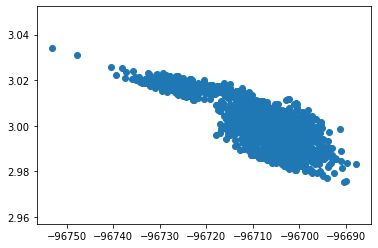

In [27]:
de.test_for_best_p()

In [14]:
np.save('non_linear', de.best_p)

In [29]:
np.save('linear', new_linerar_coeffs)